# **MERJENJE SOVRAŽNEGA GOVORA**

V tem projektu izkoriščamo podatkovni množico "Merjenje sovražnega govora", celovito zbirko podatkov, objavljeno v skladu s študijama Kennedy in sod. (2020) ter Sachdeva in sod. (2022). Niz obsega 39.565 komentarjev, natančno označenih s strani obsežne skupine 7.912 anotatorjev, kar ustvari podatkovno množico s 135.556 vrsticami. Osnovno področje analize je osredotočeno na "oceno sovražnega govora", neprekinjeno merilo, ki kaže stopnjo sovraštva v danem komentarju. Poleg tega niz ponuja vpogled v deset sestavnih ordinalnih oznak, ki zajemajo občutke nespoštovanja, žalitve, ponižanja, nasilja in več.

Opazna značilnost niza podatkov je razdelitev komentarjev v osem ciljnih skupin identitet, vključno z raso/etničnostjo, vero, spolom, spolno usmerjenostjo in drugimi. Vsaka skupina identitet se dodatno razdeli na 42 podskupin, ki ponujajo niansiran pogled na naravo sovražnega govora v različnih dimenzijah. Niz podatkov vključuje tudi demografske podatke anotatorjev, s šestimi atributi, ki prinašajo vpogled v ozadje anotatork.

Ko se poglobimo v ta niz podatkov, je naš cilj uporabiti tehnike strojnega učenja za razlikovanje vzorcev, napovedovanje ocen sovražnega govora in odkrivanje vpogledov v dinamiko sovražnega govora med različnimi skupinami identitet. Ta raziskava je ključna za razvoj učinkovitih orodij in strategij za boj proti sovražnemu govoru na spletu ter za spodbujanje varnejšega digitalnega okolja.

OPIS STOLPCEV

**hate_speech_score** - Neprekinjena mera sovražnega govora, kjer višje vrednosti označujejo več sovražnosti, nižje pa manj sovražnosti. > 0,5 je približno sovražni govor, < -1 je protislovni ali podporni govor, in -1 do +0,5 je nevtralen ali dvoumen.

**text** - Lahko obdelano besedilo objave na družbenem omrežju.

**comment_id** - Edinstvena identifikacijska številka za vsak komentar.

**annotator_id** - Edinstvena identifikacijska številka za vsakega anotatorja.

**sentiment** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**respect** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**insult** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**humiliate** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**status** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**dehumanize** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**violence** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**genocide** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**attack_defend** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**hatespeech** - Ordinalna oznaka, ki je združena v neprekinjeno oceno.

**annotator_severity** - Ocenjena stopnja interpretacijske pristranskosti anotatorja.

Poleg tistih, podatkovna množica vsebuje tudi demografshe podatke o anotatorjih.





In [1]:
import pandas as pd

df = pd.read_csv("hate_comments_data.csv", index_col='comment_id', decimal=".", sep=",")

In [2]:
df.head()

annotator_id  platform  sentiment  respect  insult  humiliate  \
comment_id                                                                  
47777              10873         3          0        0       0          0   
39773               2790         2          0        0       0          0   
47101               3379         3          4        4       4          4   
43625               7365         3          2        3       2          1   
12538                488         0          4        4       4          4   

            status  dehumanize  violence  genocide  ...  hypothesis  \
comment_id                                          ...               
47777            2           0         0         0  ...   -1.130178   
39773            2           0         0         0  ...   -1.146973   
47101            4           4         0         0  ...   -0.207369   
43625            2           0         0         0  ...   -0.055536   
12538            4           4         4         1  ...    0.104225   

            annotator_gender  annotator_trans    annotator_educ  \
comment_id                                                        
47777                   male               no   college_grad_ba   
39773                 female               no      some_college   
47101                   male               no      some_college   
43625                   male               no  high_school_grad   
12538                 female               no           masters   

            annotator_income     annotator_ideology  annotator_age  \
comment_id                                                           
47777                   <10k                neutral           25.0   
39773                   <10k                neutral           30.0   
47101              100k-200k  slightly_conservative           41.0   
43625                10k-50k                neutral           42.0   
12538                10k-50k                neutral           27.0   

            annotator_race  annotator_religion  annotator_sexuality  
comment_id                                                           
47777                white           christian             straight  
39773                white             nothing             straight  
47101                white             atheist             straight  
43625                white           christian             straight  
12538                black             nothing             straight  

[5 rows x 30 columns]

#**KLASIFIKACIJA**

V tem projektu izvajamo klasifikacijo besedila na podlagi vsebine komentarjev.  Naš cilj je razvrstiti komentarje v eno od treh kategorij: pozitivno, negativno in nevtralno, pri čemer se posebej posvečamo zmožnosti prepoznavanja negativnih komentarjev. Za dosego tega cilja uporabljamo različne tehnike za predprocesiranje besedila, ki jih bomo kasneje podrobneje pojasnili. Končni rezultat projekta bo sistem za klasifikacijo, ki bo sposoben učinkovito identificirati negativne komentarje. Ta sistem lahko potencialno služi kot orodje za preprečevanje sovražnega govora na družbenih omrežjih.

**IZBIRA ZNAČILNIC** <BR>
Najprej določimo, katere stolpce bomo uporabili za proces klasifikacije.

V tej fazi projekta se osredotočamo na izbor ključnih značilnic, to je atributov ali stolpcev iz našega podatkovnega niza, ki bodo ključnega pomena pri napovedovanju kategorij komentarjev.

Vhodni podatek bo stolpec ki vsebuje besedilo komentarjev.

Poleg tega bomo za izračun izhodnega stolpca rabili še stolpec 'hate_speech_score'

In [3]:
selected_columns = [
    'hate_speech_score',
    'text'
]

dfK = df[selected_columns].copy(deep=True)

dfK.head()

hate_speech_score  \
comment_id                      
47777                   -3.90   
39773                   -6.52   
47101                    0.36   
43625                    0.26   
12538                    1.54   

                                                         text  
comment_id                                                     
47777       Yes indeed. She sort of reminds me of the elde...  
39773       The trans women reading this tweet right now i...  
47101       Question: These 4 broads who criticize America...  
43625       It is about time for all illegals to go back t...  
12538       For starters bend over the one in pink and kic...

**ODSTRANJEVANJE DVOJNIH KOMENTARJEV ZARADI PREPREČEVANJA IZTEKA PODATKOV** <BR>

Pri tem koraku identificiramo in odstranjujemo podvojene komentarje z namenom preprečevanja vhajanja podatkov.

Da bi ohranili integriteto in zanesljivost našega modela za klasifikacijo, je ključno, da se znebimo morebitnih podvojenih komentarjev v našem podatkovnem nizu. Odstranjevanje dvojnih komentarjev je bistveno za preprečevanje vhajanja podatkov, kar pomeni, da bi lahko isti komentar vplival na učenje modela in njegovo ocenjevanje na podatkih, ki jih ni videl med učenjem.

In [4]:
import numpy as np

dfK = dfK.reset_index()

scores_dict = dfK.groupby('comment_id')['hate_speech_score'].mean().to_dict()

dfK = dfK.drop_duplicates(subset='comment_id')

dfK['hate_speech_score'] = dfK['comment_id'].map(scores_dict)

dfK = dfK.set_index('comment_id')


**DODAJANJE STOLPCA SPEECH_TYPE** <BR>

Dopolnimo naš podatkovni niz z dodajanjem stolpca 'speech_type', ki nam bo posredoval informacijo, ali gre za negativen, pozitiven ali nevtralen govor. Vrednost tega novega stolpca bomo napovedali s pomočjo našega modela za klasifikacijo, pri čemer bomo upoštevali vrednosti stolpca 'hate_speech_score'.

Stolpec 'hate_speech_score' vsebuje neprekinjeno merjenje stopnje sovražnega govora v komentarjih. Glede na to bomo izračunali vrednost stolpca 'speech_type':



1.   Če je vrednost 'hate_speech_score' večja od 0,5, bomo komentar označili kot sovražni govor (vrednost stolpca 'speech_type' je 'negative').
2.   Če je vrednost 'hate_speech_score' manjša od -1, bomo komentar razvrstili kot pozitiven govor (vrednost stolpca 'speech_type' je 'positive').
3.   Če je vrednost 'hate_speech_score' med -1 in 0,5, bomo komentar opredelili kot nevtralen ali dvoumen govor (vrednost stolpca 'speech_type' je 'neutral').





In [5]:
for index, row in dfK.iterrows():
    if(row['hate_speech_score'] >0.5):
      dfK.at[index, 'speech_type'] = 'negative'
    elif (row['hate_speech_score'] <= -1):
      dfK.at[index, 'speech_type'] = 'positive'
    else:
      dfK.at[index, 'speech_type'] = 'neutral'


In [6]:
dfK.shape

(39565, 3)

In [7]:
import seaborn as sns

sns.countplot(data=dfK, x='speech_type')

<Axes: xlabel='speech_type', ylabel='count'>

**PREDPROCESIRANJE PODATKOV** <br>



Za izvedbo predprocesiranja besedila bomo v tem projektu uporabljali knjižnico nltk (Natural Language Toolkit). Nltk je odprtokodna knjižnica, specializirana za obdelavo in analizo naravnega jezika v programskem jeziku Python.

Nltk ponuja široko paleto funkcij za predprocesiranje besedila, vključno s stopnjo odstranjevanja neželenih znakov, pretvorbo besed v osnovne oblike (lematizacija), razcepitev besed v stavke (segmentacija), in še več. Poleg tega vključuje tudi bogat nabor korpusov in virov za razvoj in evalvacijo modelov za obdelavo naravnega jezika.

Z uporabo nltk bomo zagotovili, da bo naše besedilo ustrezno predprocesirano, kar bo izboljšalo natančnost in učinkovitost našega modela za klasifikacijo komentarjev.

**Manjkajoče vrednosti** <BR>

Najprej preverimo morebitno prisotnost manjkajočih vrednosti v našem podatkovnem nizu. To je ključen korak v procesu predprocesiranja, saj lahko odsotnost določenih vrednosti vpliva na učinkovitost našega modela.

Po temeljitem pregledu ugotavljamo, da v našem podatkovnem nizu ni manjkajočih vrednosti. To pomeni, da so vsi stolpci in atributi v vsakem komentarju ustrezno zabeleženi in niso obremenjeni z manjkajočimi ali neveljavnimi podatki.

In [8]:
dfK.isnull().sum()

hate_speech_score    0
text                 0
speech_type          0
dtype: int64

**Izločitev komentarjev v angleščini** <BR>

Pri tem koraku smo uporabili knjižnico langid, da bi zadržali samo tiste komentarje, ki so napisani v angleškem jeziku. Uporaba tega pristopa je bila namenjena zmanjšanju kompleksnosti problema, s čimer smo ciljali na bolj specializiran model za klasifikacijo besedil v enem jeziku.

Knjižnica langid omogoča prepoznavo jezika besedila na podlagi lingvističnih značilnosti. S prepoznavo in ohranjanjem samo angleških komentarjev želimo zagotoviti, da se naš model osredotoča na specifične značilnosti angleškega jezika, kar lahko pripomore k boljši uspešnosti in natančnosti klasifikacije. To je še posebej pomembno v primerih, ko imamo opravka z večjezičnimi podatkovnimi nizi, saj omejitev na en jezik poenostavi učno in evalvacijsko okolje našega modela.

In [9]:
dfK.tail()

hate_speech_score  \
comment_id                      
26287                   -3.10   
14785                   -0.20   
30588                   -1.69   
21008                   -2.49   
37080                   -4.88   

                                                         text speech_type  
comment_id                                                                 
26287       🔥PUBG JAPAN SERIES 🔥Grade2 Day2 6/7 <Round8> 1...    positive  
14785       لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...     neutral  
30588       Umar khalid, sahela rashid, kanhiyan kumar जैस...    positive  
21008       @AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...    positive  
37080       عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي  نص...    positive

In [ ]:
!pip install langid

In [11]:
import langid

indices_to_drop = []

for index, row in dfK.iterrows():
    text_content = row['text'].strip()
    if text_content:  # Skip empty or whitespace-only text
        lang, _ = langid.classify(text_content)
        if lang != 'en':
            indices_to_drop.append(index)

# Keep only rows with all comments in English
dfK_english = dfK.drop(indices_to_drop, axis=0)


In [12]:
dfK.shape

(39565, 3)

In [13]:
dfK_english.shape

(38616, 3)

In [14]:
dfK_english.tail()

hate_speech_score  \
comment_id                      
20061                   -3.98   
20066                   -4.80   
20063                   -1.50   
20064                   -4.41   
20062                   -5.43   

                                                         text speech_type  
comment_id                                                                 
20061       I, a Catholic and a Jesuit, am grateful for th...    positive  
20066       NUGS lauds Ghanaian Muslims for their immense ...    positive  
20063       Lady in the back Blinks when "her" camera red ...    positive  
20064       Lailat al Miraj mubarak to all Muslims.. I'm w...    positive  
20062       I've always been proud of the Igbo tribe and o...    positive

In [15]:
import seaborn as sns

sns.countplot(data=dfK_english, x='speech_type')

<Axes: xlabel='speech_type', ylabel='count'>

**Tokenizacija** <br>

Tokenizacija je postopek razdelitve besedila na manjše enote, imenovane "žetoni" ali "tokeni". Vsako skupino znakov, ki jo ločujejo presledki ali drugi znaki, obravnavamo kot samostojno enoto. Hkrati v tem procesu vse črke pretvorimo v male črke (lowercase), kar omogoča enotno in dosledno obdelavo besedila ne glede na velikost črk.

Zakaj uporabljamo žetone različnih dolžin kot značilke za klasifikacijo besedila?

Raznolikost dolžin žetonov nam omogoča boljšo reprezentacijo različnih struktur v besedilu. Različno dolgi žetoni zajemajo različne nivoje informacij, od posameznih besed do celih fraz ali stavkov. To je pomembno, ker so nekateri konteksti in pomeni besed odvisni od sosednjih besed ali izrazov. Uporaba različnih dolžin žetonov kot značilk za klasifikacijo besedila omogoča modelu, da zajame različne vidike jezikovne strukture in konteksta, kar prispeva k večji natančnosti pri razlikovanju med različnimi vrstami govorov ali pisanja.

Za tokenizacijo smo uporabili funkcijo nltk.tokenize, ki je del knjižnice nltk (Natural Language Toolkit). Ta funkcija nam omogoča razdelitev besedila na posamezne enote, imenovane žetoni.

Enostavno pojasnjeno, funkcija deluje tako, da bere besedilo in identificira ločilne znake, kot so presledki, vejice in pike. Kadar naleti na te znake, ustvari nov žeton in ga dodaja v seznam. Hkrati pretvori vse črke v besedilu v male črke.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download()

In [18]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

tokens = [word.lower() for sent in dfK_english['text'] for word in word_tokenize(sent)]

In [19]:
len(tokens)

1134549

In [20]:
from nltk import FreqDist

tokeni_freq = FreqDist(tokens)

for beseda, pogostost in tokeni_freq.most_common(10):
    print("{w:<15}{f}".format(w=beseda, f=pogostost))


.              46125
the            30267
,              26854
to             24465
and            23197
a              21653
you            19695
i              19274
of             16414
is             13026


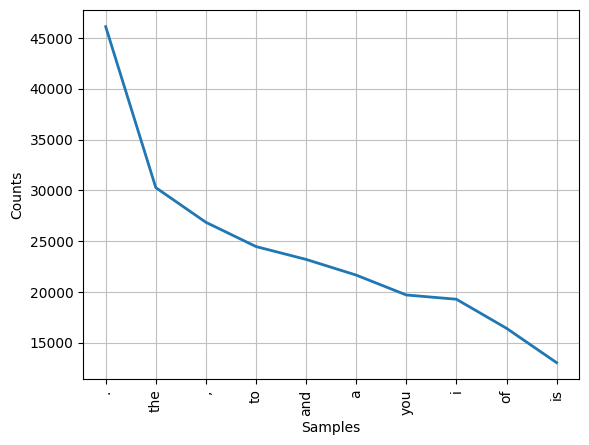

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
tokeni_freq.plot(10, cumulative=False)

**Odstranitev 'stop' besed** <br>

V procesu predprocesiranja smo izvedli odstranitev t. i. 'stop' besed, ki so besede z visoko frekvenco pojavljanja v besedilu, vendar imajo malo pomensko vrednost. Med takšnimi besedami v angleščini se na primer nahajajo "a", "an", "the", "in", "on", "with" in druge.

Za izvedbo tega koraka smo uporabili seznam 'stopwords', ki smo ga definirali s pomočjo knjižnice nltk, natančneje s funkcijo stopwords. Poleg standardnih 'stop' besed smo v seznam dodali tudi ločila (punctuation characters), saj v mnogih primerih ne prispevajo k pomenu besedila.

In [22]:
from nltk.corpus import stopwords

print(stopwords.words("english"))
print(len(stopwords.words("english")))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
stop_list = stopwords.words('english') + list(string.punctuation)

Po odtranitvi 'stop' besed smo izpisali frekvence najbolj pogostih besed, ki so ostaled. Sedaj so to besede, ki nosijo večji pomen in dejansko prispevajo k razumevanju vsebine komentarjev. Te besede imajo večjo informativno vrednost in so ključne pri pravilni klasifikaciji komentarjev, saj bolje odražajo specifičnosti in kontekst v besedilu. Tak pristop nam pomaga osredotočiti se na bistvene informacije in povečati natančnost našega modela za klasifikacijo besedila.

In [25]:
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_list]

In [26]:
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
freq_dist = FreqDist(filtered_tokens)

# Print the most common words
for word, freq in freq_dist.most_common(10):
    print("{w:<15}{f}".format(w=word, f=freq))


url            5792
people         5354
like           5107
fuck           3859
white          3431
women          3240
get            3203
would          2623
fucking        2445
one            2283


In [27]:
freq_dist.plot(10, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

**Lemitizacija besed** <br>

Lematizacija besed pomeni pretvorbo besede v njeno osnovno ali korensko obliko. Osnovna oblika besede se imenuje lema, ki predstavlja nekakšen "središčni" ali "osnovni" pomen besede.

Namen lematizacije v procesu analize besedila je dobiti enotno reprezentacijo za različne oblike besede. Na primer, besede "tekem", "tekmovanju" in "tekmovanjih" bi po lematizaciji vse postale "tekma". To nam omogoča, da se osredotočimo na bistveno pomensko vsebino besedila, ne glede na njihove morfološke razlike.

Uporaba lematizacije v procesu klasifikacije besedila pripomore k ustvarjanju bolj doslednih in zanesljivih značilk. Pomaga nam zmanjšati dimenzionalnost besedilnih podatkov, saj se različne oblike besed poenotijo v eno osnovno obliko. To vodi do boljše ujemanje med podobnimi pomeni, kar posledično povečuje učinkovitost modela pri razvrščanju besedil v različne kategorije. Lematizacija nam tako pomaga izboljšati natančnost in interpretabilnost rezultatov v procesu klasifikacije.

In [28]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

tokeni_stemm = [wordnet_lemmatizer.lemmatize(t) for t in filtered_tokens ]
tokeni_frekvenca_stemm = FreqDist(tokeni_stemm)

for word, freq in tokeni_frekvenca_stemm.most_common(20):
    print("{w:<15}{f}".format(w=word, f=freq))

url            5792
people         5404
like           5193
woman          4567
fuck           4012
white          3626
get            3501
u              2971
bitch          2923
would          2623
one            2510
fucking        2445
go             2329
want           2293
black          2275
as             2249
country        2069
shit           2052
know           1967
need           1934


In [ ]:
def predprocesiraj(besedilo):
    male_crke = besedilo.lower()
    tokeni = word_tokenize(male_crke)
    tokeni_brez_stop = [wordnet_lemmatizer.lemmatize(token) for token in tokeni if token not in stop_list]
    return ' '.join(tokeni_brez_stop)

**Pripravljanje n-gramov** <br>

N-grami so zaporedja sosednjih besed določene dolžine, kjer je "N" število besed v zaporedju. Na primer, če imamo stavek "The quick brown fox", so 2-grami (bigrami) "The quick", "quick brown", in "brown fox", medtem ko so 3-grami (trigrami) "The quick brown" in "quick brown fox".

Zakaj uporabljamo n-grame?

Ohranjanje konteksta: N-grami omogočajo ohranjanje konteksta, saj zajemajo več besed hkrati. To je še posebej koristno pri jezikovnih konstrukcijah, ki so odvisne od sosednjih besed.

Razumevanje zaporedja: Z uporabo n-gramov lahko model bolje razume, kako se besede povezujejo med seboj in tvorijo pomen v besedilu.

Izboljšanje natančnosti: N-grami lahko prispevajo k boljši natančnosti modela pri klasifikaciji besedila, saj so bolj občutljivi na lokalne vzorce in fraze.

Prilagodljivost: S prilagodljivostjo v izbiri vrednosti "N" lahko prilagodimo, koliko besed zajame vsak n-gram, kar nam daje dodatno kontrolo nad kompleksnostjo modela.

V procesu priprave n-gramov besedila predstavljajo dodatno raven informacij, ki jih model lahko izkoristi za boljše razumevanje in klasifikacijo besedila.

In [29]:
from nltk import ngrams

dvojcki = FreqDist(ngrams(tokeni_stemm, 2))
for phrase, freq in dvojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('white', 'people')           470
('look', 'like')              454
('gon', 'na')                 427
('go', 'back')                398
('wan', 'na')                 373
('black', 'people')           333
('url', 'url')                298
('piece', 'shit')             261
('white', 'supremacist')      238
('sound', 'like')             191


In [30]:
trojcki = FreqDist(ngrams(tokeni_stemm, 3))
for phrase, freq in trojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('happy', 'pride', 'month')   50
('go', 'back', 'country')     45
('ha', 'ha', 'ha')            36
('wan', 'na', 'fuck')         32
('go', 'back', 'came')        31
('gon', 'na', 'get')          30
('url', 'url', 'url')         26
('need', 'go', 'back')        24
('united', 'state', 'america')23
('go', 'back', 'europe')      21


**Čiščenje besedila**

V tem segmentu uporabljamo več funkcij za predprocesiranje besedila s ciljem, da ga pripravimo na boljše ujemanje z modelom za klasifikacijo. Tu so nekatere ključne metode, ki jih uporabljamo:



*   replaceURL: Zamenja URL naslove z besedo "url".
*   replaceAbbrev: Nadomešča nekatere pogoste kraticami s polnimi izrazi, na primer "what's" z "what is".
* removeUnicode: Odstrani unicode nize, kot so "\u002c" in "x96".
removeRepeatPattern: Odstrani ponovljene vzorce črk, kar pomaga zmanjšati šum v besedilu.
* replaceAtUser: Zamenja uporabniška imena (označena z "@") z besedo "atUser".
replaceMultiToxicWords: Nadomešča različne toksične besede z bolj nevtralnimi izrazi.
* removeNumbers: Odstrani števila iz besedila.
replaceMultiPunc: Nadomešča ponovljene ločilne znake z enojnimi, na primer "!!!" z " mxm ".
* my_cleaner: Glavna funkcija, ki združuje zgornje metode. Besedilo postavi v male črke, izvede predhodno opisane zamenjave in odstranitve, ter opravi lematizacijo. <br>

Čiščenje besedila pomaga pri odstranjevanju nepotrebnih informacij, šuma in standardizaciji besed, kar pripomore k boljši interpretaciji besedila s strani modela za klasifikacijo. S tem se povečuje natančnost in robustnost modela, ki se uči iz predhodno pripravljenih in očiščenih besedil.

In [40]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAbbrev(text):
    text = re.sub(r"what's", "what is ",text)
    text = re.sub(r"\'ve", " have ",text)
    text = re.sub(r"can't", "cannot ",text)
    text = re.sub(r"n't", " not ",text)
    text = re.sub(r"i'm", "i am ",text)
    text = re.sub(r"\'re", " are ",text)
    text = re.sub(r"\'d", " would ",text)
    text = re.sub(r"\'ll", " will ",text)
    text = re.sub(r"\'scuse", " excuse ",text)
    text = re.sub(r"\'s", " ",text)
    return text

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r' ', text)
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    return text
def removeRepeatPattern(text):
    text=re.sub(r'([a-zA-Z])\1{2,}\b',r'\1\1',text)
    text=re.sub(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1',text)
    text=re.sub(r'[ ]{2,}',' ',text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def replaceMultiToxicWords(text):
    text = re.sub(r'(fuckfuck)','fuck fuck ',text)
    text = re.sub(r'(f+)( *)([u|*|_]+)( *)([c|*|_]+)( *)(k)+','fuck',text)
    text = re.sub(r'(h+)(a+)(h+)(a+)','ha ha ',text)
    text = re.sub(r'(s+ *h+ *[i|!]+ *t+)','shit',text)
    text = re.sub(r'\b(n+)(i+)(g+)(a+)\b','nigga',text)
    text = re.sub(r'\b(n+)([i|!]+)(g+)(e+)(r+)\b','nigger',text)
    text = re.sub(r'\b(d+)(o+)(u+)(c+)(h+)(e+)( *)(b+)(a+)(g+)\b','douchebag',text)
    text = re.sub(r'([a|@][$|s][s|$])','ass',text)
    text = re.sub(r'(\bfuk\b)','fuck',text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = re.sub(r"(^|\W)\d+", " ", text)
    text = re.sub("5","s",text)
    text = re.sub("1","i",text)
    text = re.sub("0","o",text)
    return text

def replaceMultiPunc(text):
    text=re.sub(r'([!])\1\1{2,}',r' mxm ',text)
    text=re.sub(r'([?])\1\1{2,}',r' mqm ',text)
    text=re.sub(r'([*])\1\1{2,}',r'*',text)
    return text


replace_pun = {}
separators = set('"%&\'()+,-./:;<=>@[\\]^_`{|}~')
for punc in separators:
    replace_pun[punc] = ' '
replace_pun['&']=' and '

def my_cleaner(s):
    s = s.lower()
    s=replaceURL(s)
    s=removeUnicode(s)
    s=removeNumbers(s)
    s=replaceAbbrev(s)
    s=replaceMultiToxicWords(s)
    s=replaceMultiPunc(s)
    s=removeRepeatPattern(s)

    for punc in separators:
        s= s.replace(punc,replace_pun[punc])
    tokens = nltk.tokenize.word_tokenize(s)
    tokens_lemitizer = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens_lemitizer)

In [41]:
dfK_english['text_clean'] = dfK_english['text'].apply(my_cleaner)

In [42]:
dfK_english.head(20)

hate_speech_score  \
comment_id                      
47777                   -3.90   
39773                   -6.52   
47101                    0.36   
43625                    0.26   
12538                    1.54   
11001                   -4.93   
13168                    0.17   
17034                    2.08   
40171                   -0.66   
1006                    -0.38   
23643                   -3.60   
14241                   -0.50   
20583                   -2.43   
30879                   -1.80   
29527                    0.99   
23016                   -3.09   
22819                   -1.85   
36534                    1.62   
7287                     1.00   
32074                   -2.88   

                                                         text speech_type  \
comment_id                                                                  
47777       Yes indeed. She sort of reminds me of the elde...    positive   
39773       The trans women reading this tweet right now i...    positive   
47101       Question: These 4 broads who criticize America...     neutral   
43625       It is about time for all illegals to go back t...     neutral   
12538       For starters bend over the one in pink and kic...    negative   
11001       Sounds like the kinda wholsesome life I'd die ...    positive   
13168       Who the fuck is this insignificant simple mind...     neutral   
17034              Fuck off you insufferable retarded faggot.    negative   
40171       OMG! The EGO's of these young, young, inexperi...     neutral   
1006        Worthless whore, these tits with look nice wit...     neutral   
23643       9) uhhhh i like being lgbt a lot. i feel proud...    positive   
14241       Instagram refugees lmao, let's build a wall in...     neutral   
20583       @terryelaineh1 @UKLabour Why do 3.8 million #5...    positive   
30879       I said it yesterday, I knew this is about to g...    positive   
29527       White Small Little Invisible Clits Are A Disgr...    negative   
23016       Ladies buy a gun learn how to use it effective...    positive   
22819       @ghostofthor same energy as the "YOU DONT LOOK...    positive   
36534       @suddenlywestan Because you are a country of m...    negative   
7287        This sub is full of grade A faggots  Comedy fu...    negative   
32074       Progress 👍 LGBT rights in Europe: Some countri...    positive   

                                                   text_clean  
comment_id                                                     
47777       yes indeed she sort of reminds me of the elder...  
39773       the trans woman reading this tweet right now i...  
47101       question these broad who criticize america wha...  
43625       it is about time for all illegals to go back t...  
12538       for starter bend over the one in pink and kick...  
11001       sound like the kinda wholsesome life i would d...  
13168       who the fuck is this insignificant simple mind...  
17034               fuck off you insufferable retarded faggot  
40171       omg ! the ego of these young young inexperienc...  
1006        worthless whore these tit with look nice with ...  
23643       uhh i like being lgbt a lot i feel proud of wh...  
14241         instagram refugee lmao let build a wall instead  
20583       terryelainehi uklabour why do million swomen n...  
30879       i said it yesterday i knew this is about to go...  
29527       white small little invisible clit are a disgra...  
23016       lady buy a gun learn how to use it effectively...  
22819       ghostofthor same energy a the you dont look in...  
36534       suddenlywestan because you are a country of me...  
7287        this sub is full of grade a faggot comedy fuck...  
32074       progress lgbt right in europe some country mov...

**Računanje TF in IDF** <br>

TF (Frekvenca besed) v kontekstu klasifikacije besedila se nanaša na frekvenco določene besede v dokumentu. Meri, kako pogosto se določena beseda pojavi v določenem dokumentu. Ideja je, da so besede, ki se pojavljajo pogosteje v dokumentu, verjetno pomembnejše za razumevanje vsebine in konteksta tega dokumenta.

IDF (Inverzna frekvenca dokumentov) je mera, ki pomaga oceniti pomembnost besede v več dokumentih. Izračunava redkost besede tako, da upošteva, v koliko dokumentih v celotni podatkovni množici se beseda pojavi. Besede, ki se pojavljajo v manjšem številu dokumentov, veljajo za bolj pomembne, saj so verjetno bolj značilne in zagotavljajo več informacij o vsebini.

TF-IDF (Frekvenca besed-Inverzna frekvenca dokumentov) je kombinacija TF in IDF. Izračuna se z množenjem rezultatov za TF in IDF za vsako besedo. TF-IDF dodeljuje večje uteži besedam, ki so pogoste v dokumentu, vendar redke v celotnem naboru podatkov. Tako pomaga prepoznati in poudariti besede, ki so pomembne znotraj dokumenta in hkrati značilne za celoten nabor podatkov.



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(ngram_range=(1,3), lowercase=True, stop_words=stop_list, preprocessor=my_cleaner)
vhod = vectorizer.fit_transform(dfK_english['text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [35]:
# Poglejmo vrednosti za prvo instanco (prvo novico)
print(type(vhod))
print(vhod[0])

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 571045)	0.13978654942064977
  (0, 484440)	0.13978654942064977
  (0, 570989)	0.13978654942064977
  (0, 814161)	0.13978654942064977
  (0, 593372)	0.13978654942064977
  (0, 147880)	0.13978654942064977
  (0, 777799)	0.13978654942064977
  (0, 815366)	0.13978654942064977
  (0, 685761)	0.13978654942064977
  (0, 710089)	0.13978654942064977
  (0, 771858)	0.13978654942064977
  (0, 729466)	0.13978654942064977
  (0, 477011)	0.13978654942064977
  (0, 528429)	0.13978654942064977
  (0, 549588)	0.13978654942064977
  (0, 394833)	0.13978654942064977
  (0, 201332)	0.13978654942064977
  (0, 601517)	0.13978654942064977
  (0, 669355)	0.13978654942064977
  (0, 354682)	0.13978654942064977
  (0, 822278)	0.13978654942064977
  (0, 580404)	0.13457151443249368
  (0, 571043)	0.130871388223604
  (0, 484439)	0.13978654942064977
  (0, 570988)	0.13978654942064977
  :	:
  (0, 601516)	0.13978654942064977
  (0, 669354)	0.13978654942064977
  (0, 354681)	0.13978654942064977
  (0,

**Uporaba klasifikacijskega algoritma**

Po predprocesiranju besedila je izbira in implementacija klasifikacijskega algoritma v osnovi enaka kot pri strukturiranih podatkih.

V tem primeru smo uporabili multinomski Naivni Bayes (MNB), ki je algoritem za klasifikacijo, primeren za delo z besedilom. MNB temelji na Bayesovem pristopu in predpostavlja, da so značilke neodvisne med seboj.

MNB deluje tako da:

1. Računa verjetnost pripadnosti razreda za vsako značilko.
2. Predpostavlja neodvisnost značilk, kar omogoča lažje računanje verjetnosti.
3. Izračuna skupno verjetnost za vsak razred in izbere razred z najvišjo verjetnostjo. <br>

MNB se najpogosteje uporablja za naloge klasifikacije besedila, kot so analiza sentimenta, določanje tem, klasifikacija dokumentov in podobno.

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB(alpha=0.2)
x_train, x_test, y_train, y_test = train_test_split(vhod, dfK_english['speech_type'], test_size=0.3, random_state=123)
mnb.fit(x_train, y_train)
print("Točnost:", accuracy_score(y_test, mnb.predict(x_test)))

Točnost: 0.5915407854984894


**OCENITEV KAKOVOSTI MODELA** <br>

Iz dobijenih rezultatov klasifikacije lahko razberemo, da skupna točnost v vseh kategorijah ni posebej visoka. Kljub temu je model zelo učinkovit pri zaznavanju negativnih komentarjev, kar se odraža v rezultatih preciznosti in priklica za negativno kategorijo.

**Preciznost 64% za negativne komentarje** pomeni, da kadar model klasificira komentar kot negativen, smo lahko 64% prepričani, da je to pravilno. Še pomembneje pa je, da **priklic 85% za negativno kategorijo** pomeni, da model od vseh negativnih komentarjev pravilno prepozna 85%.

Vredno je opozoriti, da ima model največ težav pri ločevanju nevtralnih komentarjev od negativnih, kar lahko izhaja iz šuma v podatkih, ter zaradi pristranskosti anotatorjev, ki so komentarje ocenjevali.

Naš cilj je bil ustvariti model, ki lahko prepozna negativne komentarje, s čimer bi preprečili širjenje sovražnega govora na socialnih omrežjih. Kljub splošno srednji točnosti se model izkaže za učinkovitega pri prepoznavanju negativnih komentarjev, kar je ključno za dosego ciljev projekta.

Classification Report:
               precision    recall  f1-score   support

    positive       0.63      0.49      0.55      2984
     neutral       0.42      0.29      0.34      3422
    negative       0.63      0.85      0.73      5179

    accuracy                           0.59     11585
   macro avg       0.56      0.54      0.54     11585
weighted avg       0.57      0.59      0.57     11585



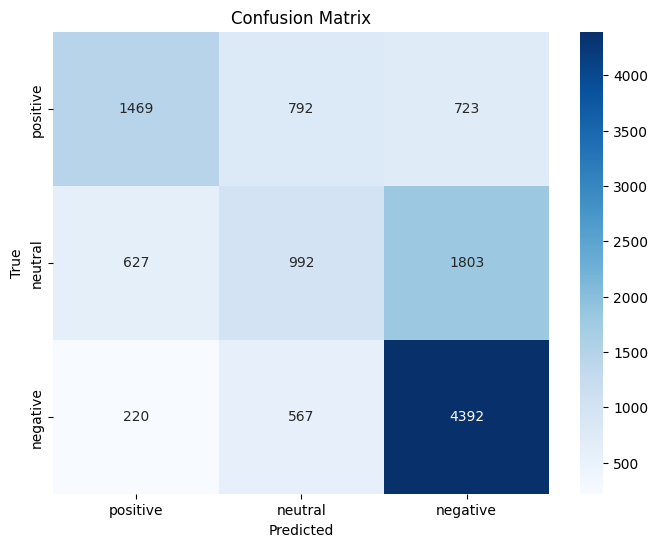

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = mnb.predict(x_test)
categories = ['positive', 'neutral', 'negative']


classification_rep = classification_report(y_test, y_pred, target_names=categories)

print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **REGRESIJA**

V naslednjem delu projekta smo razvili model za regresijo z namenom napovedovanja vrednosti stolpca 'annotator_severity' za vsakega anotatorja, pri čemer sem uporabil njihove demografske podatke.

Stolpec 'annotator_severity' predstavlja ocenjeno pristranskost anotatorjev pri interpretaciji vprašalnika. To pomeni, da meri stopnjo, do katere anotatorji nagibajo k določenim interpretacijam pri ocenjevanju komentarjev.

 Stolpci podatkovne množice, katero smo uporabljali za regresijo vključujejo identifikacijsko številko anotatorja ('annotator_id') ter demografske podatke, kot so spol, izobrazba, dohodek, ideologija, rasa, religija in spolna usmerjenost anotatorjev. Z namenom napovedovanja 'annotator_severity' smo uporabili model za regresijsko analizo, ki bo skušal razumeti, kako se te demografske spremenljivke povezujejo z ocenjeno pristranskostjo anotatorjev.

In [ ]:
selected_columns = [
    'annotator_id',
    'annotator_severity',
    'annotator_gender',
    'annotator_trans',
    'annotator_educ',
    'annotator_income',
    'annotator_ideology',
    'annotator_race',
    'annotator_religion',
    'annotator_sexuality'
]

dfR = df[selected_columns].copy(deep=True)

dfR.head()


annotator_id  annotator_severity annotator_gender annotator_trans  \
comment_id                                                                      
47777              10873                0.36             male              no   
39773               2790               -0.35           female              no   
47101               3379               -0.48             male              no   
43625               7365                0.86             male              no   
12538                488               -0.54           female              no   

              annotator_educ annotator_income     annotator_ideology  \
comment_id                                                             
47777        college_grad_ba             <10k                neutral   
39773           some_college             <10k                neutral   
47101           some_college        100k-200k  slightly_conservative   
43625       high_school_grad          10k-50k                neutral   
12538                masters          10k-50k                neutral   

           annotator_race annotator_religion annotator_sexuality  
comment_id                                                        
47777               white          christian            straight  
39773               white            nothing            straight  
47101               white            atheist            straight  
43625               white          christian            straight  
12538               black            nothing            straight

In [ ]:
dfR.shape

(135555, 10)

**ODSTRANITEV PONAVLJAJOČIH ANOTATORJEV**

V procesu preprečevanja uhajanja podatkov smo morali izločiti vrstice z duplikati glede na identifikacijske številke anotatorjev ('annotator_id'). To je bilo potrebno, ker so anotatorji ocenjevali več različnih komentarjev, kar pomeni, da bi se lahko isti anotator nahajal v več vrstic v naših podatkih.

Če bi te duplikate ohranili, bi lahko pri učenju modela prišlo do uhajanja podatkov, kar bi vplivalo na pristranskost rezultatov. Odstranjevanje duplikatov na ravni 'annotator_id' nam omogoča, da ohranimo enotnost podatkov, ki jih model uporablja za učenje in testiranje. S tem zagotavljamo, da model ne upošteva ocen istega anotatorja večkrat, kar bi lahko vodilo do nepravičnih predpostavk ali precenjevanja njihovega vpliva na rezultate.







In [ ]:
import numpy as np

dfR = dfR.reset_index()

scores_dict = dfR.groupby('annotator_id')['annotator_severity'].mean().to_dict()

dfR = dfR.drop_duplicates(subset='annotator_id')

dfR['annotator_severity'] = dfR['annotator_id'].map(scores_dict)

dfR = dfR.set_index('annotator_id')

dfR.drop(['comment_id'], axis=1, inplace=True)

**TRANSFORMACIJE PODATKOV**

Za zmanjšanje kompleksnosti in preprečevanje prenatreniranosti smo izvedli naslednje spremembe v podatkih:

* 'annotator_lgbt' stolpec: ustvarjen nov stolpec, ki združuje informacije o spolni usmerjenosti in transrodnosti.

* 'annotator_ideology' stolpec: preoblikovane vrednosti v tri glavne kategorije: 'liberal', 'conservative' in 'neutral'.
*'annotator_educ' stolpec: preoblikovane vrednosti v tri glavne kategorije: 'college', 'high_school' in 'very_high_educ'.


S temi spremembami smo ustvarili bolj preprost model, kar lahko pripomore k izboljšanju njegove sposobnosti splošne prilagoditve na nove podatke.







In [ ]:
for index, row in dfR.iterrows():
    if(row['annotator_sexuality'] == 'gay' or row['annotator_sexuality'] == 'bisexual' or row['annotator_trans'] == 'yes'):
      dfR.at[index, 'annotator_lgbt'] = 'yes'
    elif (row['annotator_sexuality'] == 'straight' and row['annotator_trans'] == 'no'):
      dfR.at[index, 'annotator_lgbt'] = 'no'
    elif (row['annotator_sexuality'] == 'other' and row['annotator_trans'] == 'prefer_not_to_say'):
      dfR.at[index, 'annotator_lgbt'] = 'not specified'

dfR.drop(['annotator_sexuality', 'annotator_trans'], axis=1, inplace=True)

In [ ]:
for index, row in dfR.iterrows():
    if(row['annotator_ideology'] == 'liberal' or row['annotator_ideology'] == 'slightly_liberal' or row['annotator_ideology'] == 'extremely_liberal'):
      dfR.at[index, 'annotator_ideology'] = 'liberal'
    elif (row['annotator_ideology'] == 'conservative' or row['annotator_ideology'] == 'slightly_conservative' or row['annotator_ideology'] == 'extremely_conservative'):
      dfR.at[index, 'annotator_ideology'] = 'conservative'
    elif (row['annotator_ideology'] == 'neutral' or row['annotator_ideology'] == 'no_opinion'):
      dfR.at[index, 'annotator_ideology'] = 'neutral'

In [ ]:
for index, row in dfR.iterrows():
    if(row['annotator_educ'] == 'college_grad_ba' or row['annotator_educ'] == 'college_grad_aa' or row['annotator_educ'] == 'some_college'):
      dfR.at[index, 'annotator_educ'] = 'college'
    elif (row['annotator_educ'] == 'high_school_grad' or row['annotator_educ'] == 'some_high_school'):
      dfR.at[index, 'annotator_educ'] = 'high_school'
    elif (row['annotator_educ'] == 'masters' or row['annotator_educ'] == 'phd'):
      dfR.at[index, 'annotator_educ'] = 'very_high_educ'

In [ ]:
dfR.head()

annotator_severity annotator_gender  annotator_educ  \
annotator_id                                                        
10873                       0.36             male         college   
2790                       -0.35           female         college   
3379                       -0.48             male         college   
7365                        0.86             male     high_school   
488                        -0.54           female  very_high_educ   

             annotator_income annotator_ideology annotator_race  \
annotator_id                                                      
10873                    <10k            neutral          white   
2790                     <10k            neutral          white   
3379                100k-200k       conservative          white   
7365                  10k-50k            neutral          white   
488                   10k-50k            neutral          black   

             annotator_religion annotator_lgbt  
annotator_id                                    
10873                 christian             no  
2790                    nothing             no  
3379                    atheist             no  
7365                  christian             no  
488                     nothing             no

**VIZUALZACIJE PODATKOV** <br>

Pred izvajanjem regresijske analize je ključnega pomena vizualizirati podatke, da bi dobili občutek, kako so povezani. To nam pomaga razumeti porazdelitev spremenljivk, prepoznati morebitne vzorce in ugotoviti, ali obstajajo očitne korelacije med spremenljivkami.

Vizalizacija podatkov nam pomaga prepoznati morebitne anomalije, izstopajoče vrednosti, in oblikovati pričakovanja pred izvedbo regresijske analize.

V skladu s tem pristopom bomo pred nadaljevanjem regresijske analize uporabili vizualizacije, da si pridobimo celovit vpogled v naše podatke in potencialne odnose med spremenljivkami.

Graf spodaj predstavlja škatlo z ročaji za analizo razporeditve pristrakosti anotatorjev med različnimi ideološkimi stališči anotatorjev. Dodatno so podatki razdeljeni glede na raven izobrazbe anotatorjev. Na x-osi imamo različna ideološka stališča, na y-osi pa vrednosti pristranskosti anotatorjev.

Ročaji (črte zgoraj in spodaj) na vsaki škatli predstavljajo razpon vrednosti, ki se nahajajo znotraj določene kategorije. Srednja črta v škatli predstavlja median, zgornji in spodnji rob škatle pa kvartila. Podatki so razdeljeni tudi glede na raven izobrazbe (barva), kar omogoča hkratno opazovanje razporeditve med različnimi skupinami anotatorjev.

Ta vizualizacija omogoča ugotavljanje morebitnih povezav med ideološkim stališčem, resnostjo anotatorjev in njihovo izobrazbo.

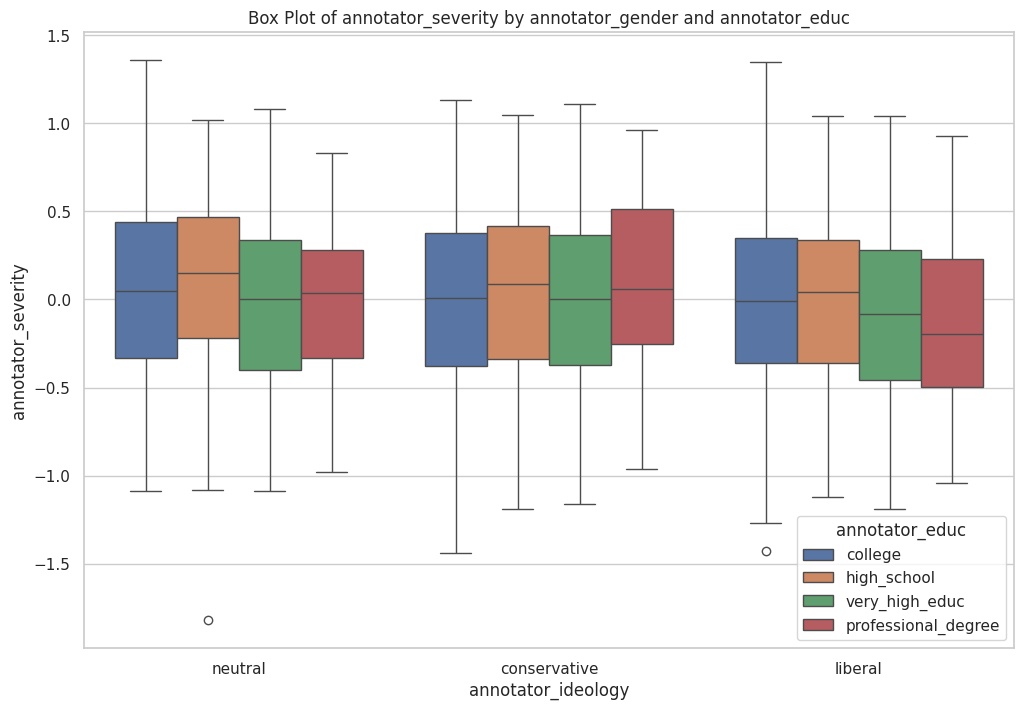

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='annotator_ideology', y='annotator_severity', data=dfR, hue='annotator_educ')

# Show the plot
plt.title('Box Plot of annotator_severity by annotator_gender and annotator_educ')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=dfR, x='annotator_educ', y='annotator_severity')
plt.xticks(rotation=60)

([0, 1, 2, 3],
 [Text(0, 0, 'college'),
  Text(1, 0, 'high_school'),
  Text(2, 0, 'very_high_educ'),
  Text(3, 0, 'professional_degree')])

Med izvajanjem vizualizacije podatkov smo opazili neuravnoteženost v podatkih. Neuravnoteženost pomeni, da imamo v določenih skupinah, kategorijah ali razredih bistveno manj primerkov kot v drugih. V kontekstu regresije, neuravnoteženost lahko povzroči, da se model bolj osredotoči na bolj zastopane skupine in ignorira manj zastopane. To lahko privede do manj natančnih napovedi ali nepravičnih ocen vrednosti, zlasti za manjšinske skupine.

V primeru neuravnoteženosti v regresiji bi model lahko bolje napovedoval vrednosti za večinske skupine, vendar bi lahko imel omejen uspeh pri napovedovanju vrednosti za manjšinske skupine, ki so lahko pomembne za cilje analize. To lahko povzroči nerealno optimistično oceno učinkovitosti modela, zato je pomembno, da se zavedamo neuravnoteženosti in ustrezno prilagodimo analizo ali izberemo ustrezne metode obvladovanja neuravnoteženosti.

In [ ]:
lgbt_counts = dfR['annotator_lgbt'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(lgbt_counts, labels=lgbt_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.axis('equal')

plt.title('Distribution of LGBT Annotators in the dataset')

plt.show()


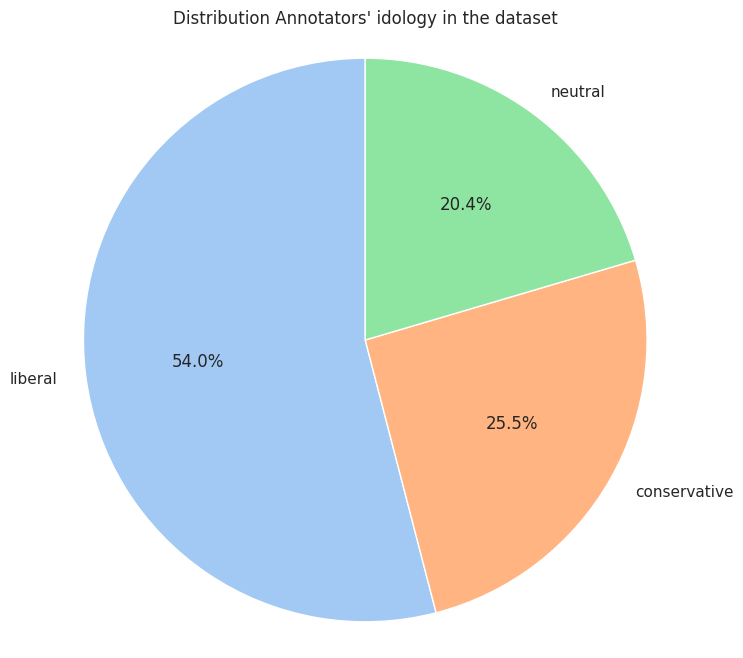

In [ ]:
idology_counts = dfR['annotator_ideology'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(idology_counts, labels=idology_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.axis('equal')

plt.title("Distribution Annotators' idology in the dataset")

plt.show()


In [ ]:
religion_counts = dfR['annotator_religion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=religion_counts.index, y=religion_counts, palette='pastel')

plt.title('Distribution of Annotators\' Religion in the Dataset')
plt.xlabel('Religion')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure labels are not cut off

plt.show()


<ipython-input-222-fd29c1994c3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=religion_counts.index, y=religion_counts, palette='pastel')


<ipython-input-18-972a68449fa2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts, palette='pastel')


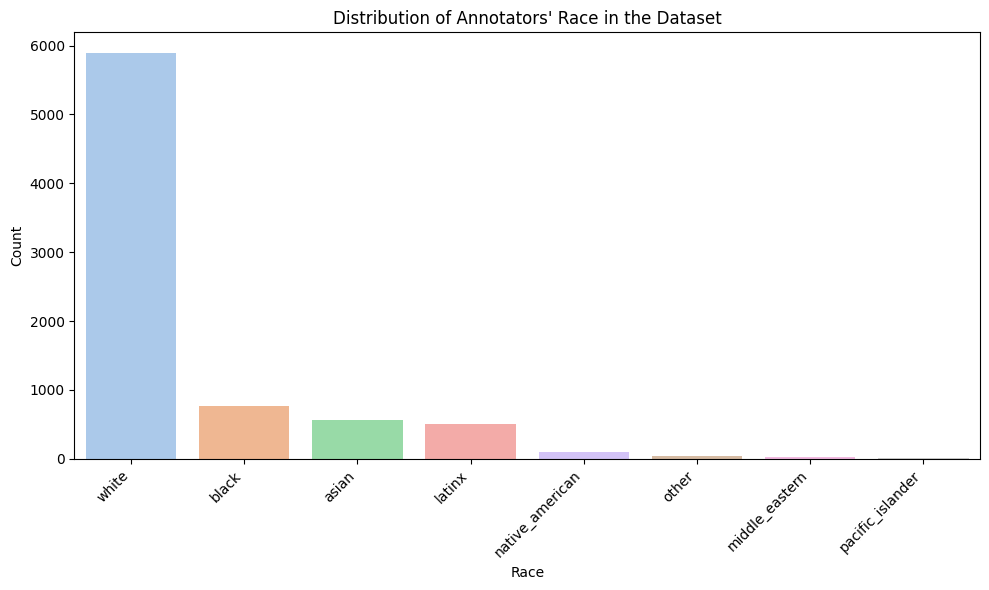

In [ ]:
race_counts = dfR['annotator_race'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts, palette='pastel')

plt.title('Distribution of Annotators\' Race in the Dataset')
plt.xlabel('Race')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure labels are not cut off

plt.show()


([0, 1, 2, 3, 4],
 [Text(0, 0, 'male'),
  Text(1, 0, 'female'),
  Text(2, 0, 'prefer_not_to_say'),
  Text(3, 0, 'non-binary'),
  Text(4, 0, 'self-describe')])

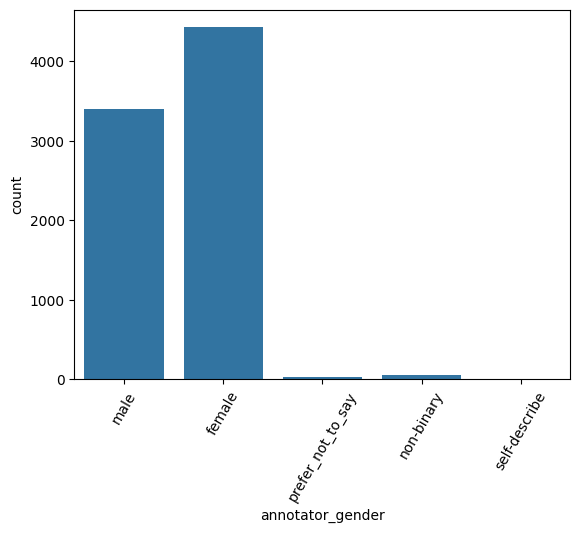

In [ ]:
sns.countplot(data=dfR, x='annotator_gender')
plt.xticks(rotation=60)

**PREDPROCESIRANJE PODATKOV**

**Obravnava manjkajočih vrednosti** <br>

Manjkajoče vrednosti so lahko posledica nepopolnosti zajemanja podatkov ali tehničnih težav med zbiranjem podatkov. Prisotnost manjkajočih vrednosti lahko negativno vpliva na analizo podatkov in delovanje modelov.

Simple Imputer je orodje za nadomeščanje manjkajočih vrednosti v podatkih. Uporablja se za vzpostavitev celovitosti podatkovnega nabora pred nadaljno analizo ali izgradnjo modela.

Simple Imputer nadomešča manjkajoče vrednosti z določenimi vrednostmi, kot so povprečja ali najbolj pogoste vrednosti, odvisno od vrste stolpca.

Za številske stolpce se manjkajoče vrednosti običajno nadomestijo s povprečjem stolpca. To ohranja numerično konsistenco v podatkih.

Za kategorične stolpce se manjkajoče vrednosti lahko nadomestijo z najpogostejšo vrednostjo v stolpcu. To ohranja kategorično strukturo in ne vnaša dodatne numerične kompleksnosti.

In [ ]:
dfR.isnull().sum()

comment_id              0
hate_speech_score       0
annotator_severity      0
annotator_gender        0
annotator_educ          1
annotator_income        6
annotator_ideology      2
annotator_race          0
annotator_religion      0
annotator_lgbt        148
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
df_st = dfR.select_dtypes(exclude=[object]).columns
df_ktg = dfR.select_dtypes(include=[object]).columns

In [ ]:
mean = SimpleImputer(missing_values=np.nan, strategy="mean")
dfR[df_st] = mean.fit_transform(dfR[df_st])
dfR.isnull().sum()

comment_id              0
hate_speech_score       0
annotator_severity      0
annotator_gender        0
annotator_educ          1
annotator_income        6
annotator_ideology      2
annotator_race          0
annotator_religion      0
annotator_lgbt        148
dtype: int64

In [ ]:
most_freq = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
dfR[df_ktg] = most_freq.fit_transform(dfR[df_ktg])
dfR.isnull().sum()

comment_id            0
hate_speech_score     0
annotator_severity    0
annotator_gender      0
annotator_educ        0
annotator_income      0
annotator_ideology    0
annotator_race        0
annotator_religion    0
annotator_lgbt        0
dtype: int64

**Pretvorba kategoričnih stolpcev v številske**

Za pretvorbo kategoričnih stolpcev v številske smo uporabljali dve različne tehnike: LabelEncoder za pretvorbo ordinalnih ter get_dummies metodo iz knjižnice pandas za pretvorbo nominalnih vrednosti.

LabelEncoder je metoda za kodiranje kategoričnih vrednosti v številske vrednosti. Uporablja se predvsem za pretvorbo ordinalnih kategorij v številske vrednosti, kjer imajo kategorije jasno določen vrstni red. Na primer, stopnje izobrazbe (npr. osnovna šola, srednja šola, fakulteta) so pogosto ordinalne vrednosti. V našem primeru smo z uporabo LabelEncoder-ja pretvorili naslednje stolpce: 'annotator_educ', 'annotator_income', 'annotator_ideology'.

Nominalne stolpce, kot so 'annotator_gender', 'annotator_race', 'annotator_religion' in 'annotator_lgbt', smo pretvorili v številske s pomočjo dummy vrednosti iz pandas knjižnice.
Nominalne vrednosti predstavljajo kategorije, ki nimajo nujno določenega hierarhičnega reda. Na primer, spol, rasa, religija ali pripadnost LGBT skupnosti so pogosto nominalne vrednosti.
Metoda get_dummies iz pandas ustvari nove stolpce (dummy stolpce) za vsako edinstveno vrednost v izbranem stolpcu. Za vsak stolpec ustvari binarni indikator prisotnosti ali odsotnosti določene vrednosti.



In [ ]:
dfR.dtypes

comment_id            float64
hate_speech_score     float64
annotator_severity    float64
annotator_gender       object
annotator_educ         object
annotator_income       object
annotator_ideology     object
annotator_race         object
annotator_religion     object
annotator_lgbt         object
dtype: object

In [ ]:
ktg = dfR.select_dtypes(include=[object])
ktg.head()

annotator_gender  annotator_educ annotator_income  \
annotator_id                                                     
10873                    male         college             <10k   
2790                   female         college             <10k   
3379                     male         college        100k-200k   
7365                     male     high_school          10k-50k   
488                    female  very_high_educ          10k-50k   

             annotator_ideology annotator_race annotator_religion  \
annotator_id                                                        
10873                   neutral          white          christian   
2790                    neutral          white            nothing   
3379               conservative          white            atheist   
7365                    neutral          white          christian   
488                     neutral          black            nothing   

             annotator_lgbt  
annotator_id                 
10873                    no  
2790                     no  
3379                     no  
7365                     no  
488                      no

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_ktg = ktg[['annotator_educ', 'annotator_income', 'annotator_ideology' ]].copy(deep=True)
for k in le_ktg:
  dfR[k] = LabelEncoder().fit_transform(dfR[k])


dfR.head()

comment_id  hate_speech_score  annotator_severity  \
annotator_id                                                      
10873            47777.0              -3.90                0.36   
2790             39773.0              -6.52               -0.35   
3379             47101.0               0.36               -0.48   
7365             43625.0               0.26                0.86   
488              12538.0               1.54               -0.54   

             annotator_gender  annotator_educ  annotator_income  \
annotator_id                                                      
10873                    male               0                 3   
2790                   female               0                 3   
3379                     male               0                 0   
7365                     male               1                 1   
488                    female               3                 1   

              annotator_ideology annotator_race annotator_religion  \
annotator_id                                                         
10873                          2          white          christian   
2790                           2          white            nothing   
3379                           0          white            atheist   
7365                           2          white          christian   
488                            2          black            nothing   

             annotator_lgbt  
annotator_id                 
10873                    no  
2790                     no  
3379                     no  
7365                     no  
488                      no

**Standardizacija številskih stolpcev** je pomemben korak pri pripravi podatkov za mnoge algoritme strojnega učenja, ki so občutljivi na različne lestvice numeričnih spremenljivk.
Standardizacija zagotavlja, da so vse numerične spremenljivke na isti skali, kar omogoča boljše delovanje modelov, ki temeljijo na numeričnih značilkah, kot so regresijski modeli.

StandardScaler uporablja zelo preprosto tehniko standardizacije, imenovano Z-transformacija.
Z-transformacija pretvori vsako vrednost v spremenljivki tako, da jo odšteje povprečje vseh vrednosti v spremenljivki in jo nato deli z njeno standardno deviacijo.

In [ ]:
from sklearn.preprocessing import StandardScaler

izhod = "annotator_severity"
stevilski = dfR.select_dtypes(exclude=[object]).columns.drop(izhod)
dfR[stevilski] = StandardScaler().fit_transform(dfR[stevilski])
dfR.head()

annotator_severity annotator_gender  annotator_educ  \
annotator_id                                                        
10873                       0.36             male       -0.489863   
2790                       -0.35           female       -0.489863   
3379                       -0.48             male       -0.489863   
7365                        0.86             male        0.556236   
488                        -0.54           female        2.648434   

              annotator_income  annotator_ideology annotator_race  \
annotator_id                                                        
10873                 1.932926            1.554879          white   
2790                  1.932926            1.554879          white   
3379                 -1.697390           -1.404160          white   
7365                 -0.487285            1.554879          white   
488                  -0.487285            1.554879          black   

             annotator_religion annotator_lgbt  
annotator_id                                    
10873                 christian             no  
2790                    nothing             no  
3379                    atheist             no  
7365                  christian             no  
488                     nothing             no

In [ ]:
dfR = pd.get_dummies(dfR, columns=['annotator_gender','annotator_race', 'annotator_religion', 'annotator_lgbt'])

In [ ]:
dfR.head()

annotator_severity  annotator_educ  annotator_income  \
annotator_id                                                         
10873                       0.36       -0.489863          1.932926   
2790                       -0.35       -0.489863          1.932926   
3379                       -0.48       -0.489863         -1.697390   
7365                        0.86        0.556236         -0.487285   
488                        -0.54        2.648434         -0.487285   

              annotator_ideology  annotator_gender_female  \
annotator_id                                                
10873                   1.554879                        0   
2790                    1.554879                        1   
3379                   -1.404160                        0   
7365                    1.554879                        0   
488                     1.554879                        1   

              annotator_gender_male  annotator_gender_non-binary  \
annotator_id                                                       
10873                             1                            0   
2790                              0                            0   
3379                              1                            0   
7365                              1                            0   
488                               0                            0   

              annotator_gender_prefer_not_to_say  \
annotator_id                                       
10873                                          0   
2790                                           0   
3379                                           0   
7365                                           0   
488                                            0   

              annotator_gender_self-describe  annotator_race_asian  ...  \
annotator_id                                                        ...   
10873                                      0                     0  ...   
2790                                       0                     0  ...   
3379                                       0                     0  ...   
7365                                       0                     0  ...   
488                                        0                     0  ...   

              annotator_religion_buddhist  annotator_religion_christian  \
annotator_id                                                              
10873                                   0                             1   
2790                                    0                             0   
3379                                    0                             0   
7365                                    0                             1   
488                                     0                             0   

              annotator_religion_hindu  annotator_religion_jewish  \
annotator_id                                                        
10873                                0                          0   
2790                                 0                          0   
3379                                 0                          0   
7365                                 0                          0   
488                                  0                          0   

              annotator_religion_mormon  annotator_religion_muslim  \
annotator_id                                                         
10873                                 0                          0   
2790                                  0                          0   
3379                                  0                          0   
7365                                  0                          0   
488                                   0                          0   

              annotator_religion_nothing  annotator_religion_other  \
annotator_id                                                         
10873                                  0                         0   
2790            

**PRIRAVA REGRESIJSKEGA MODELA**

**Izbira vhodnih in izhodnih značilnic**

Po končanem predprocesiranju podatkov je naslednji ključni korak izbira vhodnih in izhodnih stolpcev za regresijski model.

V tem projektu smo kot vhodne značilnice izbrali demografske podatke o anotatorjih, oziroma stolpce:
* annotator_gender: Spol anotatorja.
* annotator_educ: Stopnja izobrazbe anotatorja.
* annotator_income: Dohodkovna kategorija anotatorja.
* annotator_ideology: Ideološko prepričanje anotatorja.
* annotator_race: Rasa anotatorja.
* annotator_religion: Religija anotatorja.
* annotator_lgbt: Informacija o tem, ali je anotator pripadnik LGBT skupine.

Kot izhodni stolpec smo izbrali 'annotator_severity', ki nam pove stopnjo pristranskosti anotatorja med ocenjevanjem komentarjev.



In [ ]:
izhod = dfR['annotator_severity']
vhod = dfR.drop(['annotator_severity'], axis=1)

In [ ]:
vhod.head()

annotator_educ  annotator_income  annotator_ideology  \
annotator_id                                                         
10873              -0.489863          1.932926            1.554879   
2790               -0.489863          1.932926            1.554879   
3379               -0.489863         -1.697390           -1.404160   
7365                0.556236         -0.487285            1.554879   
488                 2.648434         -0.487285            1.554879   

              annotator_gender_female  annotator_gender_male  \
annotator_id                                                   
10873                               0                      1   
2790                                1                      0   
3379                                0                      1   
7365                                0                      1   
488                                 1                      0   

              annotator_gender_non-binary  annotator_gender_prefer_not_to_say  \
annotator_id                                                                    
10873                                   0                                   0   
2790                                    0                                   0   
3379                                    0                                   0   
7365                                    0                                   0   
488                                     0                                   0   

              annotator_gender_self-describe  annotator_race_asian  \
annotator_id                                                         
10873                                      0                     0   
2790                                       0                     0   
3379                                       0                     0   
7365                                       0                     0   
488                                        0                     0   

              annotator_race_black  ...  annotator_religion_buddhist  \
annotator_id                        ...                                
10873                            0  ...                            0   
2790                             0  ...                            0   
3379                             0  ...                            0   
7365                             0  ...                            0   
488                              1  ...                            0   

              annotator_religion_christian  annotator_religion_hindu  \
annotator_id                                                           
10873                                    1                         0   
2790                                     0                         0   
3379                                     0                         0   
7365                                     1                         0   
488                                      0                         0   

              annotator_religion_jewish  annotator_religion_mormon  \
annotator_id                                                         
10873                                 0                          0   
2790                                  0                          0   
3379                                  0                          0   
7365                                  0                          0   
488                                   0                          0   

              annotator_religion_muslim  annotator_religion_nothing  \
annotator_id                                                          
10873                                 0                           0   
2790                                  0                           1   
3379                                  0                           0   
7365                                  0                           0   
488                                   0                           1   

              an

**Primerjanje regrsijskih modelov** <br>

V tem koraku uporabljamo navzkrižno validacijo z namenom preverjanja, kateri od različnih regresijskih algoritmov daje najboljše rezultate za našo nalogo regresije, pri čemer uporabljamo mero srednje kvadratne napake (Mean Squared Error - MSE).

aš seznam vključuje različne regresijske modele, kot so linearna regresija, Bayesian Ridge regresija, odločitveno drevo, naključni gozd in ekstremno naključna drevesa.

Uporabljamo 4-slojno (n_splits=4) navzkrižno validacijo s premešanimi podatki.
Mero za oceno uspešnosti modela predstavlja negativna vrednost srednje kvadratne napake (neg_mean_squared_error).

Cilj je izbrati model z najnižjo negativno srednjo kvadratno napako, kar pomeni najmanjšo srednjo kvadratno napako.

Na podlagi rezultatov navzkrižne validacije lahko ugotovimo da najboše rezultate dobimo z uporabo algoritma BayesianRidge.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

models = [
    LinearRegression(),
    BayesianRidge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor()
]

mse_scores = []
model_names = []

for model in models:
    k_fold = KFold(n_splits=4, shuffle=True, random_state=123)
    scores = cross_val_score(model, vhod, izhod, cv=k_fold, scoring="neg_mean_squared_error")
    mse_scores.append(-(scores.mean()))
    model_names.append(model.__class__.__name__)
    print(model.__class__.__name__, ':', (-scores.mean()))


LinearRegression : 0.23949377204964695
BayesianRidge : 0.23829182578294333
DecisionTreeRegressor : 0.30542751377877886
RandomForestRegressor : 0.2687932135206273
ExtraTreesRegressor : 0.2905124226543291


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='blue')
plt.xlabel('Regresijski modeli')
plt.ylabel('Srednja kvadratna napaka (MSE)')
plt.title('Srednja kvadratna napaka za različne regresijske modele')
plt.xticks(rotation=45, ha='right')
plt.show()

**Delitev podatkov in izgradnja modela** <br>

V naslednjem koraku smo uporabili funkcijo train_test_split za delitev podatkovne množice na učno in testno množico. Nato smo ustvarili model BayesianRidge, ki se je naučil na učnih podatkih.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=123)

In [ ]:
model = BayesianRidge()
model.fit(x_train, y_train)

BayesianRidge()

**OCENITEV USPEŠNOSTI MODELA** <br>

Za ocenitev uspešnosti regresijskih modelov lahko uporabljamo različne metrike.

Srednja apsolutna napaka meri povprečno absolutno odstopanje med resničnimi vrednostmi in napovedanimi vrednostmi.
Vrednost 0.4048 pomeni, da je model povprečno odstopal za 0.4048 enot od resničnih vrednosti.

Srednja kvadratna napaka meri povprečno kvadratno odstopanje med resničnimi in napovedanimi vrednostmi.
Vrednost 0.2386 pomeni, da je model povprečno kvadratno odstopal za 0.2386 enot od dejanskih vrednosti.

Odstotek razložene variance meri, koliko variabilnosti v izhodnih podatkih je model uspel zajeti.
Vrednost 0.0006 pomeni zelo majhno razloženo variabilnost, kar kaže, da model ne uspe dobro pojasniti raznolikosti podatkov.

Iz rezultatov vidimo, da model ni zelo dober pri napovedovanju vrednosti annotator_severity. Možen razlog za to je, da podatki morda niso zelo reprezentativni ali pa model ni dovolj kompleksen, da bi zajel vse nianse v podatkih. Izboljšanje reprezentativnosti podatkov ali uporaba naprednejših modelov bi lahko prispevalo k boljšim rezultatom.

In [ ]:
pred = model.predict(x_test)
df_result = pd.DataFrame({'Dejanske_vr':y_test, "Napovedane_vr":pred})
df_result.head(6)

Dejanske_vr  Napovedane_vr
annotator_id                            
7871                -0.56      -0.048087
9633                 0.18       0.002020
822                 -0.25      -0.009824
8583                -0.05      -0.009824
7750                -0.59      -0.001919
6192                -0.77      -0.008093

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, pred)
print("Srednja apsolutna napaka modela je: ", mae)

Srednja apsolutna napaka modela je:  0.40483274687112836


In [ ]:
mse = mean_squared_error(y_test, pred)
print('Srednja kvadratna napaka modela je: ', mse)

Srednja kvadratna napaka modela je:  0.2386254255217622


In [ ]:
r2 = r2_score(y_test, pred)
print('Odstotek razložene variance modela je: ', r2)

Odstotek razložene variance modela je:  0.0006120313760928919


# **GRUČENJE**

V zadnjem koraku projekta smo izvedli postopek gručenja za skupine annotatorjev na podlagi njihovih demografskih podatkov. Gručenje je tehnika nenadzorovanega učenja, kjer algoritem združi podobne podatke v isto gručo oziroma skupino. Uporabili smo gručenje, da bi identificirali skupine annotatorjev z podobnimi demografskimi značilnostmi.

**IZBIRA ZNAČILNIC** <br>

Pri izbiri značilnic smo se osredotočili na stolpce, ki predstavljajo demografske podatke annotatorjev. Te značilnice so ključnega pomena za razumevanje vpliva demografskih dejavnikov na rezultate projekta. Med izbranimi značilnicami so:

* 'annotator_severity': Mera ocenjevanja interpretacijske pristranskosti annotatorja.
* 'annotator_gender': Spol annotatorja
* 'annotator_educ': Stopnja edukacije anotatorja
* 'annotator_income': Dohodek annotatorja
* 'annotator_ideology': Ideologija annotatorja
* 'annotator_race': Rasa annotatorja
* 'annotator_religion': Vera annotatorja
* 'annotator_lgbt': Informacija o tem, ali je anotator pripadnik lgbt skupine

Po izbiri značilnic smo podatke transformirali, da bi zmanjšali kompleksonst modela ter na ta način preprečili prenatreniranost modela




In [43]:
selected_columns = [
    'annotator_id',
    'annotator_severity',
    'annotator_gender',
    'annotator_educ',
    'annotator_income',
    'annotator_ideology',
    'annotator_race',
    'annotator_religion',
    'annotator_trans',
    'annotator_sexuality'
]

dfG = df[selected_columns].copy(deep=True)

dfG.head()


annotator_id  annotator_severity annotator_gender  \
comment_id                                                      
47777              10873                0.36             male   
39773               2790               -0.35           female   
47101               3379               -0.48             male   
43625               7365                0.86             male   
12538                488               -0.54           female   

              annotator_educ annotator_income     annotator_ideology  \
comment_id                                                             
47777        college_grad_ba             <10k                neutral   
39773           some_college             <10k                neutral   
47101           some_college        100k-200k  slightly_conservative   
43625       high_school_grad          10k-50k                neutral   
12538                masters          10k-50k                neutral   

           annotator_race annotator_religion annotator_trans  \
comment_id                                                     
47777               white          christian              no   
39773               white            nothing              no   
47101               white            atheist              no   
43625               white          christian              no   
12538               black            nothing              no   

           annotator_sexuality  
comment_id                      
47777                 straight  
39773                 straight  
47101                 straight  
43625                 straight  
12538                 straight

**ODSTRANITEV DVOJNIH KOMENTARJEV**

Pri izvedbi gručenja smo se soočili s podobno zahtevo po odstranitvi duplikatov kot pri regresijskem modeliranju. Ker smo gručili annotatorje glede na njihove demografske podatke, smo želeli preprečiti morebitno uhajanje podatkov in zagotoviti, da vsak annotator vpliva le na eno gručo.

In [44]:
import numpy as np

dfG = dfG.reset_index()

scores_dict = dfG.groupby('annotator_id')['annotator_severity'].mean().to_dict()

dfG = dfG.drop_duplicates(subset='annotator_id')

dfG['annotator_severity'] = dfG['annotator_id'].map(scores_dict)

dfG = dfG.set_index('annotator_id')

dfG.drop(['comment_id'], axis=1, inplace=True)

In [45]:
dfG.head()

annotator_severity annotator_gender    annotator_educ  \
annotator_id                                                          
10873                       0.36             male   college_grad_ba   
2790                       -0.35           female      some_college   
3379                       -0.48             male      some_college   
7365                        0.86             male  high_school_grad   
488                        -0.54           female           masters   

             annotator_income     annotator_ideology annotator_race  \
annotator_id                                                          
10873                    <10k                neutral          white   
2790                     <10k                neutral          white   
3379                100k-200k  slightly_conservative          white   
7365                  10k-50k                neutral          white   
488                   10k-50k                neutral          black   

             annotator_religion annotator_trans annotator_sexuality  
annotator_id                                                         
10873                 christian              no            straight  
2790                    nothing              no            straight  
3379                    atheist              no            straight  
7365                  christian              no            straight  
488                     nothing              no            straight

In [46]:
for index, row in dfG.iterrows():
    if(row['annotator_ideology'] == 'liberal' or row['annotator_ideology'] == 'slightly_liberal' or row['annotator_ideology'] == 'extremely_liberal'):
      dfG.at[index, 'annotator_ideology'] = 'liberal'
    elif (row['annotator_ideology'] == 'conservative' or row['annotator_ideology'] == 'slightly_conservative' or row['annotator_ideology'] == 'extremely_conservative'):
      dfG.at[index, 'annotator_ideology'] = 'conservative'
    elif (row['annotator_ideology'] == 'neutral' or row['annotator_ideology'] == 'no_opinion'):
      dfG.at[index, 'annotator_ideology'] = 'neutral'

In [47]:
for index, row in dfG.iterrows():
    if(row['annotator_educ'] == 'college_grad_ba' or row['annotator_educ'] == 'college_grad_aa' or row['annotator_educ'] == 'some_college'):
      dfG.at[index, 'annotator_educ'] = 'college'
    elif (row['annotator_educ'] == 'high_school_grad' or row['annotator_educ'] == 'some_high_school'):
      dfG.at[index, 'annotator_educ'] = 'high_school'
    elif (row['annotator_educ'] == 'masters' or row['annotator_educ'] == 'phd'):
      dfG.at[index, 'annotator_educ'] = 'very_high_educ'

In [48]:
for index, row in dfG.iterrows():
    if(row['annotator_sexuality'] == 'gay' or row['annotator_sexuality'] == 'bisexual' or row['annotator_trans'] == 'yes'):
      dfG.at[index, 'annotator_lgbt'] = 'yes'
    elif (row['annotator_sexuality'] == 'straight' and row['annotator_trans'] == 'no'):
      dfG.at[index, 'annotator_lgbt'] = 'no'
    elif (row['annotator_sexuality'] == 'other' and row['annotator_trans'] == 'prefer_not_to_say'):
      dfG.at[index, 'annotator_lgbt'] = 'not specified'

dfG.drop(['annotator_sexuality', 'annotator_trans'], axis=1, inplace=True)

In [49]:
dfG.head()

annotator_severity annotator_gender  annotator_educ  \
annotator_id                                                        
10873                       0.36             male         college   
2790                       -0.35           female         college   
3379                       -0.48             male         college   
7365                        0.86             male     high_school   
488                        -0.54           female  very_high_educ   

             annotator_income annotator_ideology annotator_race  \
annotator_id                                                      
10873                    <10k            neutral          white   
2790                     <10k            neutral          white   
3379                100k-200k       conservative          white   
7365                  10k-50k            neutral          white   
488                   10k-50k            neutral          black   

             annotator_religion annotator_lgbt  
annotator_id                                    
10873                 christian             no  
2790                    nothing             no  
3379                    atheist             no  
7365                  christian             no  
488                     nothing             no

**VIZUALZACIJE PODATKOV** <br>

Naslednji korak v projektu je raziskovalna vizualizacija podatkov. Pomembno je opozoriti, da so podatki v podatkovni množici zelo neuravnoteženi, pri čemer večina stolpcev vsebuje eno prevladujočo vrednost, ki zasenči preostale vrednosti.

Stolpci 'annotator_lgbt' in 'annotator_educ' sta bili še posebej prizadeti, zato smo se odločili, da ju izključimo iz podatkovnega nabora za gručenje.

In [50]:
lgbt_counts = dfG['annotator_lgbt'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(lgbt_counts, labels=lgbt_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.axis('equal')

plt.title('Porazdelitev LGBT anotatorjev v podatkovni množici')

plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'college'),
  Text(1, 0, 'high_school'),
  Text(2, 0, 'very_high_educ'),
  Text(3, 0, 'professional_degree')])

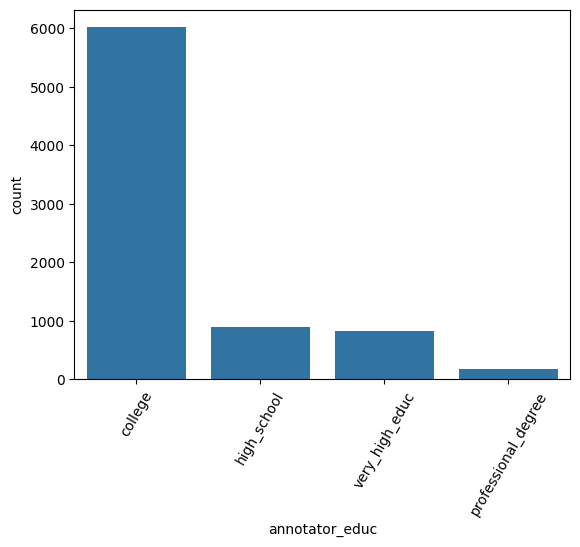

In [51]:
sns.countplot(data=dfG, x='annotator_educ')
plt.xticks(rotation=60)

Graf spodaj predstavlja število anotatorjev glede na njihov dohodek, pri čemer so podatki razdeljeni glede na raso anotatorjev. Na x-osi imamo različne dohodkovne razrede, na y-osi pa število anotatorjev v posamezni kategoriji. Barve različnih stolpcev predstavljajo različne rasne skupine.

Zanimivo je opaziti, da v datasetu osebe bele rase predstavljajo večino tistih, ki zaslužijo več kot 200 tisoč dolarjev. Ta ugotovitev odpira prostor za nadaljnjo analizo in raziskovanje razlik v dohodkih med različnimi rasnimi skupinami anotatorjev.







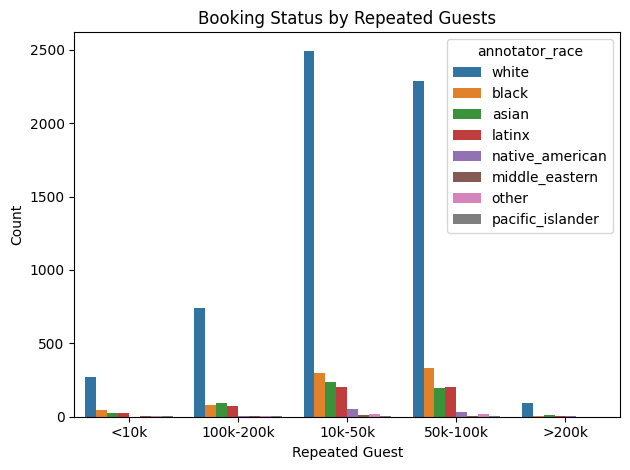

In [52]:
sns.countplot(x = 'annotator_income', hue = 'annotator_race', data = dfG)

plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.title('Booking Status by Repeated Guests')
plt.tight_layout()

plt.show()

In [53]:
dfG.drop(['annotator_lgbt', 'annotator_educ'], axis=1, inplace=True)

**PREDPROCESIRANJE PODATKOV**

**Obravnava manjkajočih vrednosti**

Pri obravnavi manjkajočih vrednosti smo se odločili za odstranjevanje vrstic, ki vsebujejo manjkajoče vrednosti, namesto da bi jih zapolnili. Razlog za to odločitev je bil, da smo v celotnem naboru podatkov, ki obsega več kot 7000 vrstic, identificirali le 8 vrstic z manjkajočimi vrednostmi.

Ker bi zapolnitev manjkajočih vrednosti lahko vplivala na rezultate gručenja, smo se odločili za odstranitev teh vrstic, da bi ohranili kakovost analize in izboljšali interpretacijo rezultatov.

In [54]:
dfG.isnull().sum()

annotator_severity    0
annotator_gender      0
annotator_income      6
annotator_ideology    2
annotator_race        0
annotator_religion    0
dtype: int64

In [55]:
dfG.dropna(axis=0, inplace=True)

In [56]:
dfG.isnull().sum()

annotator_severity    0
annotator_gender      0
annotator_income      0
annotator_ideology    0
annotator_race        0
annotator_religion    0
dtype: int64

In [57]:
dfG2 = dfG.copy(deep=True)

**Pretvorba kategoričnih stolpcev v številske** <br>

Pri preoblikovanju kategoričnih stolpcev v številske smo uporabili orodje LabelEncoder za pretvorbo kategoričnih vrednosti v numerične. Nato smo za standardizacijo podatkov uporabili StandardScaler, kar je postopek, ki prilagodi porazdelitev podatkov tako, da ima srednja vrednost 0 in standardni odklon 1.

In [58]:
ktg = dfG.select_dtypes(include=[object])
ktg.tail()

annotator_gender annotator_income annotator_ideology  \
annotator_id                                                        
7388                     male          10k-50k            neutral   
11082                    male          10k-50k       conservative   
1090                   female         50k-100k            liberal   
8678                   female         50k-100k            liberal   
2616                     male          10k-50k            neutral   

             annotator_race annotator_religion  
annotator_id                                    
7388                  white          christian  
11082                 white           buddhist  
1090                  white          christian  
8678                  white            atheist  
2616                  white            atheist

In [59]:
dfG.dtypes

annotator_severity    float64
annotator_gender       object
annotator_income       object
annotator_ideology     object
annotator_race         object
annotator_religion     object
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder

le_ktg = dfG.select_dtypes(include=[object])
for k in le_ktg:
  dfG[k] = LabelEncoder().fit_transform(dfG[k])

dfG.head()

annotator_severity  annotator_gender  annotator_income  \
annotator_id                                                           
10873                       0.36                 1                 3   
2790                       -0.35                 0                 3   
3379                       -0.48                 1                 0   
7365                        0.86                 1                 1   
488                        -0.54                 0                 1   

              annotator_ideology  annotator_race  annotator_religion  
annotator_id                                                          
10873                          2               7                   2  
2790                           2               7                   7  
3379                           0               7                   0  
7365                           2               7                   2  
488                            2               1                   7

In [61]:
from sklearn.preprocessing import StandardScaler

stevilski = dfG.select_dtypes(exclude=[object]).columns
dfG[stevilski] = StandardScaler().fit_transform(dfG[stevilski])
dfG.head()

annotator_severity  annotator_gender  annotator_income  \
annotator_id                                                           
10873                   0.736836          1.003467          1.931997   
2790                   -0.715853         -0.844951          1.931997   
3379                   -0.981839          1.003467         -1.697269   
7365                    1.759857          1.003467         -0.487513   
488                    -1.104601         -0.844951         -0.487513   

              annotator_ideology  annotator_race  annotator_religion  
annotator_id                                                          
10873                   1.555623        0.567079           -0.472964  
2790                    1.555623        0.567079            1.293334  
3379                   -1.403654        0.567079           -1.179484  
7365                    1.555623        0.567079           -0.472964  
488                     1.555623       -1.769001            1.293334

**Transformacija podatkov v dva stolpca** <br>

Pri transformaciji podatkov v dva stolpca smo uporabili metodo FastICA (Independent Component Analysis) za transformacijo demografskih podatkov annotatorjev v dva nova stolpca, ki bi jih lahko uporabili za gručenje.

To nam omogoča, da zmanjšamo dimenzionalnost in hkrati ohranimo relevantne informacije za gručenje.

In [62]:
from sklearn.decomposition import FastICA

transformirani = FastICA(n_components=2).fit_transform(dfG)
df_trans = pd.DataFrame(transformirani, columns=("Col1", "Col2"))
df_trans.head(5)



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Col1      Col2
0 -0.008650 -0.028706
1 -0.006444 -0.012980
2 -0.003702  0.019266
3 -0.003078 -0.022675
4  0.012892  0.004580

**Določitev najbolj primerneg števila gruč z uporabo metode komolca** <br>

Inercija v kontekstu gručenja je mera, ki meri, kako daleč so posamezne točke v gruči od središča te gruče. Cilj je zmanjšati inercijo, kar pomeni, da so točke znotraj posameznih gruč čim bližje središču.

Metoda komolca je tehnika, ki se uporablja za določitev najprimernejšega števila gruč v gručenju K-srednjih vrednosti. Temelji na spremljanju spremembe inercije glede na število gruč.

Optimalno število gruč za KMeans algoritem s pomočjo metode komolca najdemo tako da:

* Izračun inercije za različna števila ggruč: Izvedemo gručenje s K-srednjimi vrednostmi za različno število gruč in izračunamo inercijo za vsako število gruč.
* Spremljanje sprememb inercije: Nato spremljamo spremembe v vrednostih inercije za vsako število gruč.
* Iskanje "Komolca" v grafu: Ko se število gruč povečuje, se inercija običajno zmanjšuje. Metoda komolca išče "komolec" v grafu, kjer se zmanjšanje inercije upočasni. Točno to število gruč, kjer opazimo zavoj oziroma zmanjšanje v območju "komolca," se šteje za najprimernejše število gruč.


Na podlagi izrisanega grafa lahko ugotovimo da je v našem primeru najbolj primerno število gruč 2.



In [63]:
from sklearn.cluster import KMeans

inertia = {}

for i in range(1, 10):
  km2 = KMeans(n_clusters = i, random_state=0, n_init='auto').fit(df_trans)
  df_trans["Gruče"] = km2.labels_
  inertia[i] = km2.inertia_



In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=inertia.keys(), y=inertia.values())
plt.ylabel('Inercija')
plt.xlabel('Število gruč')

Text(0.5, 0, 'Število gruč')

**Določanje najboljših parametrov** <br>

GridSearchCV je tehnika navzkrižne validacije, ki jo uporabljamo za sistematično iskanje najboljših hiperparametrov za model. Pri gručenju KMeans smo uporabili GridSearchCV, da določimo najboljše nastavitve algoritma.

GridSearchCV izvaja navzkrižno validacijo tako, da preizkusi vse kombinacije hiperparametrov iz določenega množice vrednosti.
Za vsako kombinacijo hiperparametrov izvede model in oceni njegovo uspešnost z izbrano metriko (na primer, silhueta, ki meri kakovost gručenja).
Na koncu vrne kombinacijo hiperparametrov, ki je privedla do najboljše uspešnosti modela.

Parametri, Ki Smo Jih Preizkusili za KMeans:

* init: Metoda za začetno postavitev središč gruč (možnosti: 'k-means++', 'random').
* n_init: Število začetnih postavitev, ki se izvedejo (možnosti: 10, 20, 30).
* max_iter: Maksimalno število iteracij pri posameznem zagonu (možnosti: 100, 200, 300).

Kot rezultat GridSearchCV smo dobili optimalne hiperparametre za KMeans gručenje: {'init': 'k-means++', 'max_iter': 100, 'n_init': 10}.
Ti hiperparametri so tisti, pri katerih smo dosegli najboljšo uspešnost gručenja naših demografskih podatkov.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [100, 200, 300]
}

kmeans = KMeans(n_clusters=2, random_state=42)

silhouette_scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=silhouette_scorer)

grid_search.fit(df_trans)

print("Best Parameters: ", grid_search.best_params_)

**PRIPRAVA ALGORITMA** <br>

KMeans je algoritem gručenja, ki razdeli podatke v določeno število gruč.
Deluje po naslednjih korakih:
1. Inicializacija Središč Gruč:
Središča gruč so sprva postavljena na naključne pozicije ali na podlagi boljših začetnih pogojev, kot je 'k-means++'.
2. Prilagajanje Podatkov K Središčem:
Vsak podatek je dodeljen gruči z najbližjim središčem (glede na evklidsko razdaljo).
3. Posodabljanje Središč Gruč:
Središča se posodabljajo kot povprečje vseh podatkov v svoji gruči.
4. Ponovitev Korakov 2-3:
Postopek se ponavlja, dokler se središča in dodelitve podatkov ne ustalijo.

KMeans se pogosto uporablja za gručenje podobnih entitet, saj deluje na osnovi razdalje med točkami v prostoru.
Pri demografskih podatkih, kjer želimo identificirati skupine podobnih anotatorjev, je KMeans primeren za razdelitev podatkov v demografsko homogene skupine.

In [65]:
km = KMeans(n_clusters = 2, random_state=123, init='k-means++', max_iter=100, n_init=10)

In [66]:
km.fit(df_trans)

KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=123)

**OVREDNOTENJE USPEŠNOSTI ALGORITMA**

Izpis rezultata gručenja kaže, koliko primerkov (anotatorjev) je bilo dodeljenih vsaki gruči:

* Gruča 0: 4991 primerkov
* Gruča 1: 2915 primerkov

To pomeni, da je algoritem identificiral dve gruči, pri čemer je večina anotatorjev (4991) v gruči 0, medtem ko je v gruči 1 2915 anotatorjev.







In [67]:
import collections

collections.Counter(km.labels_)

Counter({0: 4991, 1: 2915})

Grafična predstavitev gruč prikazuje razporeditev anotatorjev glede na dva stolpca (Col1 in Col2), pri čemer barve označujejo, v katero gručo so bili dodeljeni. Kljub ločitvi gruč na grafu opazimo, da so gruče še vedno zelo blizu druga drugi. To lahko kaže na to, da je separacija med gručami precej subtilna in da obstajajo podobnosti med demografskimi podatki anotatorjev v obeh gručah.

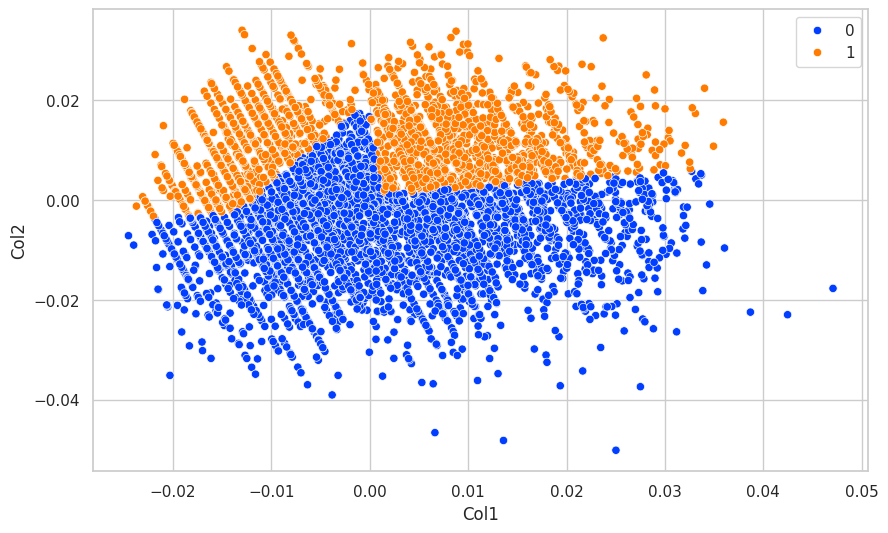

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Col1", y="Col2", data=df_trans, hue=km.labels_, palette='bright')
plt.show()


Koeficient silhuete je mera, ki ocenjuje, kako dobro so podatki razporejeni znotraj določene gruče, pri čemer vrednosti blizu 1 kažejo na dobro razporeditev, medtem ko vrednosti blizu 0 ali negativne kažejo na neustrezno gručenje.

V našem primeru vrednost 0.64 kaže na relativno dobro razporeditev in ločevanje med gručami. To pomeni, da so anotatorji znotraj iste gruče podobni med seboj, medtem ko so anotatorji iz različnih gruč različni. Kljub temu je pomembno upoštevati, da je interpretacija rezultatov odvisna od specifičnih značilnosti podatkov in ciljev analize.

Dodatno je vredno opaziti, da koeficient silhuete za gručo 1 znaša 0.78, medtem ko za gručo 0 znaša 0.57. Višje vrednosti koeficienta silhuete kažejo na bolj homogene in jasno ločene gruče. Zato lahko sklepamo, da je gruča 1 bolj homogena in ločena od gruče 0 glede na analizo koeficienta silhuete.

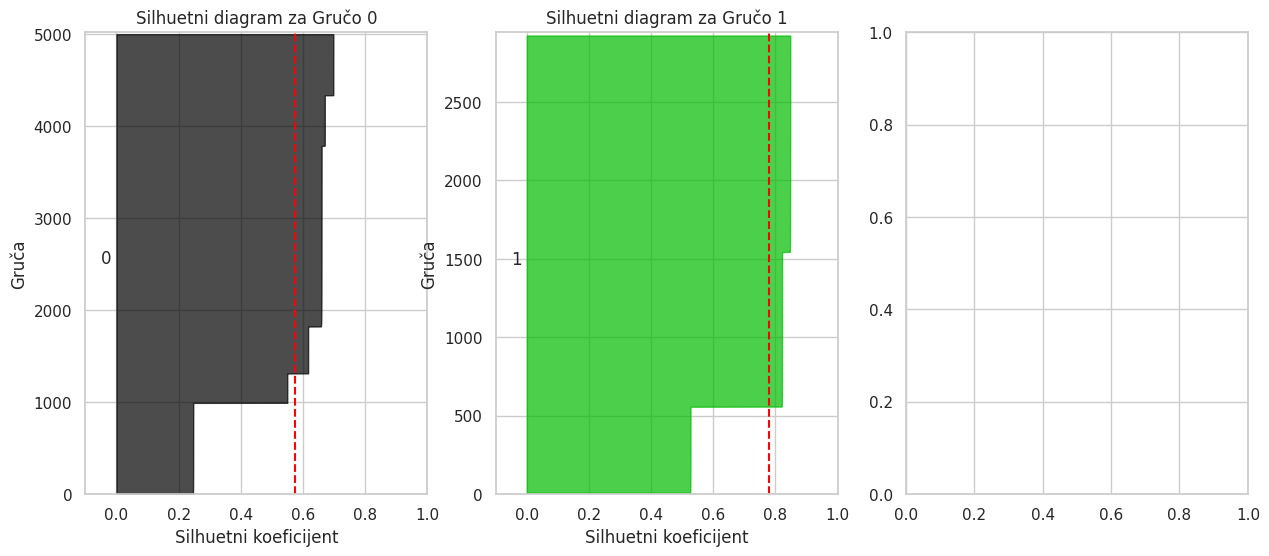

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

n_clusters = 2

silhouette_avg = silhouette_score(df_trans, km.labels_)
sample_silhouette_values = silhouette_samples(df_trans, km.labels_)

fig, ax = plt.subplots(1, 1 + n_clusters, figsize=(15, 6))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
    silhouette_avg_i = np.mean(ith_cluster_silhouette_values)

    ax[i].set_xlim([-0.1, 1])
    ax[i].set_ylim([0, len(ith_cluster_silhouette_values) + (n_clusters + 1) * 10])

    ax[i].axvline(x=silhouette_avg_i, color="red", linestyle="--")

    y_lower = 10
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    ax[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

    ax[i].set_title(f"Silhuetni diagram za Gručo {i}")
    ax[i].set_xlabel("Silhuetni koeficijent")
    ax[i].set_ylabel("Gruča")

plt.show()


Overall Silhouette Score: 0.6486236210949773
Silhouette Score for Cluster 0: 0.5729814453581453
Silhouette Score for Cluster 1: 0.7781365195864108


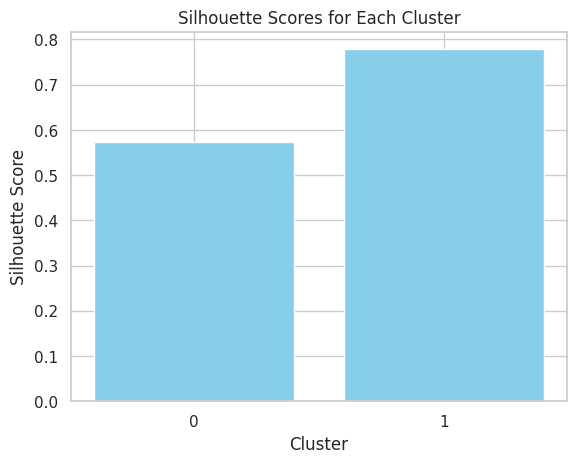

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

n_clusters = 2

silhouette_avg = silhouette_score(df_trans, km.labels_)
print("Overall Silhouette Score:", silhouette_avg)

sample_silhouette_values = silhouette_samples(df_trans, km.labels_)

cluster_silhouette_scores = []
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
    silhouette_avg_i = np.mean(ith_cluster_silhouette_values)
    cluster_silhouette_scores.append(silhouette_avg_i)
    print(f"Silhouette Score for Cluster {i}: {silhouette_avg_i}")

plt.bar(range(n_clusters), cluster_silhouette_scores, color='skyblue')
plt.xticks(range(n_clusters), [str(i) for i in range(n_clusters)])
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Each Cluster')
plt.show()


**VIZUALIZACIJA REZULTATOV** <br>

Z vizualizacijo gruč, bolje razumemo, kako so primerki v določeni gruči povezani in podobni med seboj. S tem lahko pridobimo globlji vpogled v značilnosti, ki so pomembne za vsako gručo, in opazimo morebitne vzorce, ki so prisotni znotraj posameznih skupin anotatorjev. Vizualizacija gručenja nam pomaga pri interpretaciji rezultatov ter prepoznavanju morebitnih skupnih lastnosti ali trendov med anotatorji v isti gruči.

Dodatno smo vizualizirali podatke znotraj gruče 1, ker je bila bolj homogena glede na koeficient silhuete. Iz vizualizacije vidimo, da v gruči 1 prevladujejo predvsem ženske, liberalci in belci. Ta ugotovitev nam daje vpogled v demografske značilnosti anotatorjev v tej gruči in nam pomaga bolje razumeti, kaj bi lahko povezovalo te anotatorje.

In [71]:
dfG2['Cluster'] = km.labels_
dfG2.head()

annotator_severity annotator_gender annotator_income  \
annotator_id                                                         
10873                       0.36             male             <10k   
2790                       -0.35           female             <10k   
3379                       -0.48             male        100k-200k   
7365                        0.86             male          10k-50k   
488                        -0.54           female          10k-50k   

             annotator_ideology annotator_race annotator_religion  Cluster  
annotator_id                                                                
10873                   neutral          white          christian        0  
2790                    neutral          white            nothing        0  
3379               conservative          white            atheist        1  
7365                    neutral          white          christian        0  
488                     neutral          black            nothing        1

([0, 1], [Text(0, 0, 'male'), Text(1, 0, 'female')])

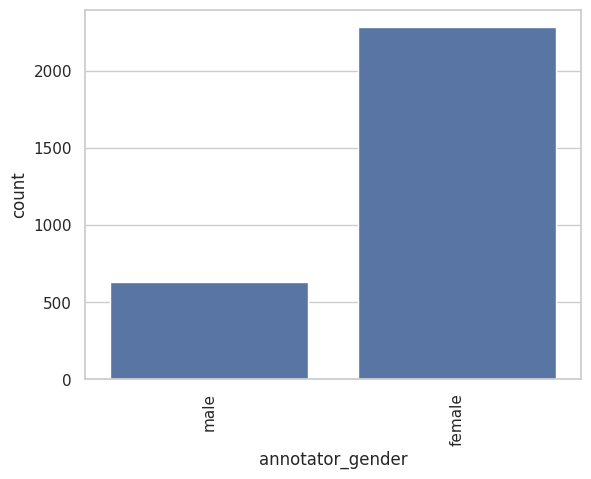

In [72]:
sns.countplot(data = dfG2[dfG2["Cluster"] == 1], x='annotator_gender')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'white'),
  Text(1, 0, 'black'),
  Text(2, 0, 'asian'),
  Text(3, 0, 'native_american'),
  Text(4, 0, 'latinx'),
  Text(5, 0, 'other'),
  Text(6, 0, 'pacific_islander'),
  Text(7, 0, 'middle_eastern')])

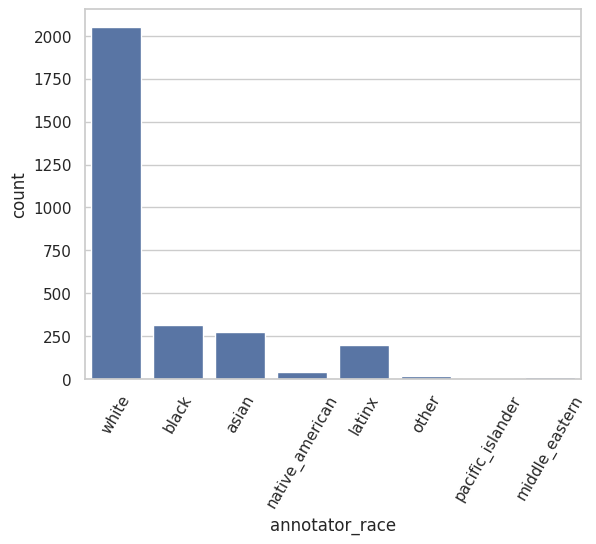

In [73]:
sns.countplot(data = dfG2[dfG2["Cluster"] == 1], x='annotator_race')
plt.xticks(rotation=60)

([0, 1, 2],
 [Text(0, 0, 'conservative'), Text(1, 0, 'neutral'), Text(2, 0, 'liberal')])

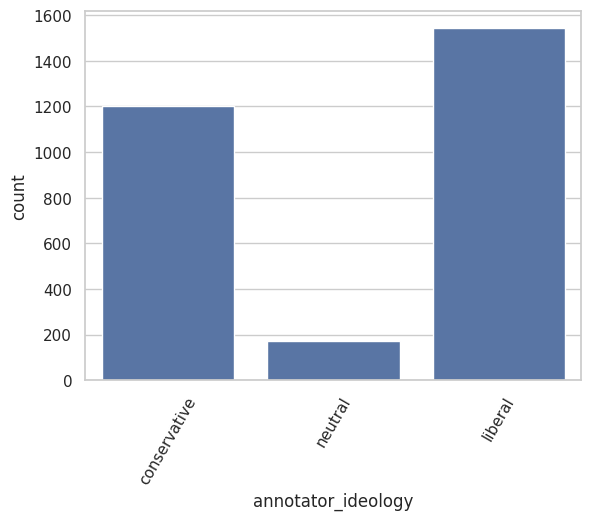

In [74]:
sns.countplot(data = dfG2[dfG2["Cluster"] == 1], x='annotator_ideology')
plt.xticks(rotation=60)